# **Amazon Web Service SaaS Sales Data Analysis**

---

**M. RAHMAT HIDAYAT SYACHRUDIN JCDS 2504**

Notebook ini adalah **Project Capstone II** dari program Job Connector-Data Science dan Machine Learning di Purwadhika.

Proyek ini mengaplikasikan keterampilan yang dipelajari, dari pengolahan data untuk menciptakan solusi berbasis data yang relevan bagi bisnis. 
Hasil akan disajikan secara jelas melalui visualisasi dan interpretasi, sehingga mendukung pengambilan keputusan yang lebih tepat dan strategis.

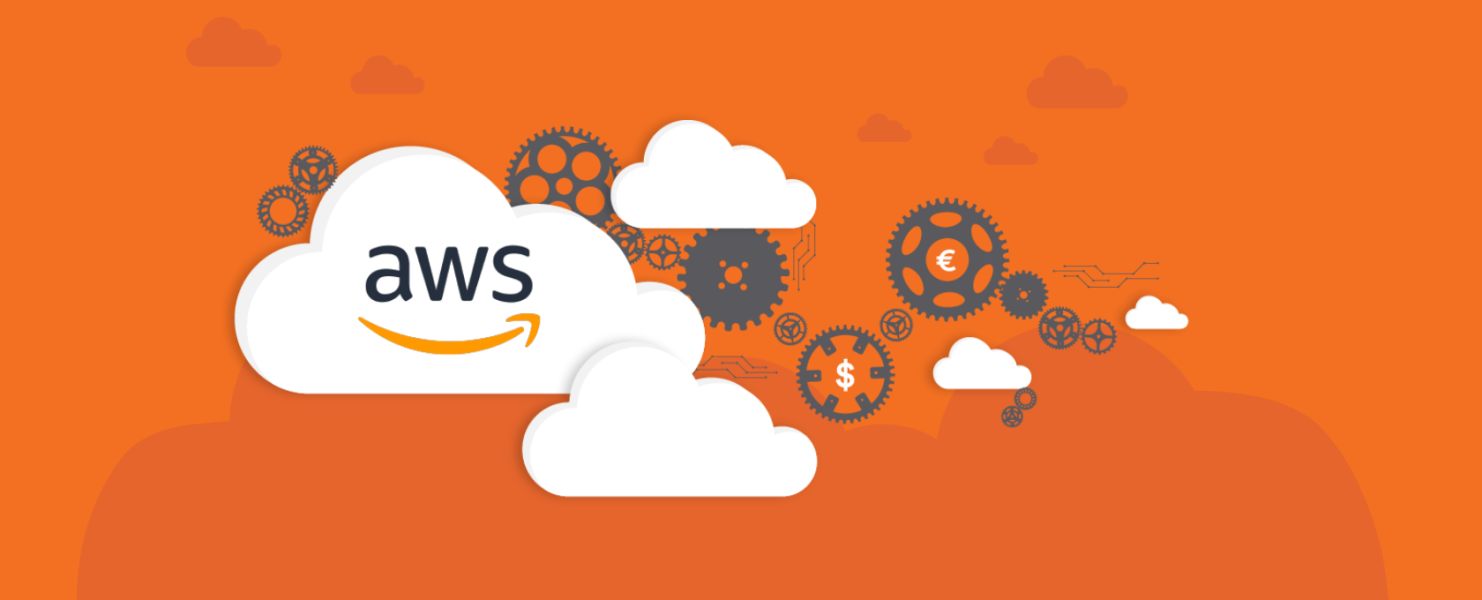

## **1. Background**

---


- **Amazon Web Services (AWS)** 

Amazon Web Services (AWS) adalah cloud yang paling lengkap dan diadopsi secara luas di dunia, menawarkan lebih dari 200 layanan berfitur lengkap dari pusat data secara global. Jutaan pelanggan—termasuk beberapa perusahaan rintisan dengan pertumbuhan tercepat, perusahaan terbesar, dan lembaga pemerintah terkemuka—menggunakan AWS untuk menurunkan biaya, menjadi lebih tangkas, dan berinovasi lebih cepat[ (Amazon Web Services, 2024)](https://aws.amazon.com/id/what-is-aws/). 


- **SaaS (Software as a Service)**:

SaaS adalah model pengiriman perangkat lunak di mana aplikasi di-hosting oleh penyedia layanan dan tersedia untuk pelanggan melalui internet. Dalam model SaaS, pengguna tidak perlu mengunduh atau menginstal aplikasi secara lokal di perangkat mereka; mereka hanya perlu mengaksesnya melalui browser web. AWS menyediakan infrastruktur dan layanan untuk mendukung aplikasi SaaS ini, memungkinkan perusahaan untuk menawarkan solusi perangkat lunak tanpa harus mengelola infrastruktur secara langsung [(techtarget, 2024)](https://www.techtarget.com/searchcloudcomputing/definition/Software-as-a-Service).



> **Stakeholder**

**- Quality Assurance (QA):**
QA perlu memahami masalah terkait margin produk yang negatif untuk mengevaluasi kualitas produk dan memastikan bahwa produk tersebut memenuhi standar kualitas dan kebutuhan pelanggan di berbagai pasar. Kualitas produk yang lebih baik dapat mengurangi pengembalian dan meningkatkan loyalitas pelanggan.

**- Finance and Marketing:**
Tim Finance perlu mengetahui strategi diskon yang mempengaruhi profitabilitas dan memastikan anggaran pemasaran digunakan secara efektif untuk meningkatkan retensi pelanggan dan mengoptimalkan margin keuntungan. Marketing harus memahami segmen pelanggan yang paling berharga untuk mengarahkan kampanye pemasaran yang lebih tepat sasaran.

**- Business Development:**
Tim Business Development harus mengetahui area pasar yang potensial dan subregion dengan kinerja buruk untuk mengembangkan strategi pertumbuhan dan ekspansi. Informasi ini membantu mereka fokus pada produk yang menguntungkan dan mengurangi eksposur terhadap risiko di subregion dengan margin negatif.

> **Rumusan Masalah:**

**1. Bagaimana perusahaan dapat meningkatkan profitabilitas produk dengan margin rendah atau negatif?**

**2. Bagaimana cara mengoptimalkan segmentasi pelanggan berdasarkan perilaku pembelian?**

**3. Bagaimana perusahaan dapat meningkatkan kinerja pasar di subregion dengan margin negatif?**


> **Goals Sebelum Analisis:**
1. `Meningkatkan Penjualan dan Market Share:` Fokus pada peningkatan penjualan keseluruhan di berbagai pasar tanpa pertimbangan mendalam terkait margin keuntungan.
2. `Mendorong Diskon dan Promosi:` Menggunakan diskon dan promosi besar-besaran untuk menarik pelanggan tanpa memahami dampaknya terhadap profitabilitas produk secara menyeluruh.
3. `Mengembangkan Produk Berdasarkan Tren Pasar:` Melakukan pengembangan produk baru berdasarkan tren umum, tanpa mempertimbangkan kebutuhan spesifik dari berbagai subregion.

## **2. Deskripsi Kolom**

---

Dataset ini berisi data transaksi dari sebuah perusahaan SaaS fiktif yang menjual perangkat lunak penjualan dan pemasaran kepada perusahaan lain. Setiap baris dalam dataset mewakili satu produk dalam suatu transaksi. Kolom-kolom dalam dataset ini mencakup berbagai informasi terkait transaksi tersebut.

Berikut adalah dataset Asli: [(Sumber)](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales)

| No. | Nama Kolom    | Deskripsi Kolom                                                |
|----|----------------|------------------------------------------------------------|
| 1  | `Row ID`         | Identifikasi unik untuk setiap transaksi.                  |
| 2  | `Order ID`       | Identifikasi unik untuk setiap pesanan.                    |
| 3  | `Order Date`     | Tanggal ketika pesanan ditempatkan.                         |
| 4  | `Date Key`       | Representasi numerik dari tanggal pesanan (YYYYMMDD).       |
| 5  | `Contact Name`   | Nama orang yang menempatkan pesanan.                       |
| 6  | `Country`        | Negara tempat pesanan ditempatkan.                         |
| 7  | `City`           | Kota tempat pesanan ditempatkan.                            |
| 8  | `Region`         | Wilayah tempat pesanan ditempatkan.                         |
| 9  | `Subregion`      | Subwilayah tempat pesanan ditempatkan.                      |
| 10 | `Customer`       | Nama perusahaan yang menempatkan pesanan.                  |
| 11 | `Customer ID`    | Identifikasi unik untuk setiap pelanggan.                   |
| 12 | `Industry`       | Industri yang dimiliki oleh pelanggan.                      |
| 13 | `Segment`        | Segmen pelanggan (SMB, Strategis, Enterprise, dll.).       |
| 14 | `Product`        | Produk yang dipesan.                                       |
| 15 | `License`        | Kunci lisensi untuk produk.                                |
| 16 | `Sales`          | Jumlah penjualan total untuk transaksi.                    |
| 17 | `Quantity`       | Jumlah total barang dalam transaksi.                       |
| 18 | `Discount`       | Diskon yang diterapkan pada transaksi.                     |
| 19 | `Profit`         | Keuntungan dari transaksi.                                  |


In [181]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from scipy.stats import normaltest

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', None)

In [221]:
# Mengimpor Dataset
df = pd.read_csv('SaaS-Sales.csv', 
                 parse_dates=['Order Date'],    # Mengubah semua format tanggal dari objek menjadi Datetime64[ns]
                 dtype= {'Customer ID': str})   # Mengubah format ID karena mengandung Alfanumerik
df = df.drop(columns=['Row ID','Date Key']) # Kolom Date key sama nilainya dengan order date, jadi yang digunakan order date dan kolom date key di hapus. untuk kolom row id sama dengan index.

# menampilkan 5 baris data teratas dan terbawah, serta data acak
display(df.head(), df.tail(), df.sample(5))
# Menampilkan total baris
print(f'Dataset ini memiliki {len(df)} Baris')


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,AMER-2023-119914,2023-05-05,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
7699,APJ-2023-151799,2023-12-15,Bella Hodges,South Korea,Daegu,APJ,APAC,Cisco Systems,1019,Tech,Enterprise,Support,U3Y0GX5H6R,25.710,3,0.0,6.6846
7365,EMEA-2022-127243,2022-11-29,Joe Ross,France,Paris,EMEA,EU-WEST,Wells Fargo,1099,Finance,Strategic,ContactMatcher,ZXYKZEI2O5,6.888,2,0.7,-5.0512
4422,EMEA-2023-159464,2023-05-19,Andrew Smith,Finland,Vantaa,EMEA,NOR,Johnson & Johnson,1055,Healthcare,Strategic,OneView,PG3IYYOLP8,17.240,2,0.0,4.4824
7623,APJ-2020-124464,2020-07-14,Sam Gill,Philippines,Quezon City,APJ,APAC,Safeway,1079,Retail,Enterprise,OneView,Q3ZBQIQ8ML,39.480,1,0.0,11.0544
8729,EMEA-2021-103870,2021-12-27,Blake Campbell,South Africa,Johannesburg,EMEA,MEA,AT&T,1010,Communications,Strategic,Marketing Suite - Gold,1A62OGL95P,22.512,3,0.2,2.2512


Dataset ini memiliki 9994 Baris


> Script ini bertujuan untuk mengimpor, membersihkan, dan menampilkan informasi awal dari dataset yang berisi data transaksi penjualan SaaS. Setelah itu, script juga menghitung jumlah total baris dalam dataset untuk memberikan gambaran tentang ukuran data.

## **3. Data Understanding and Data Cleaning**

---

Data Understanding and Data Cleaning bertujuan untuk **mendapatkan pemahaman yang mendalam tentang dataset yang akan dianalisis**. Ini mencakup proses eksplorasi data untuk **mengidentifikasi pola, outlier, atau masalah kualitas data yang mungkin ada**.

In [183]:
# Menampilkan jumlah baris dan kolom yang ada di Dataset

a,b = df.shape
print(f'Dalam Dataset ini terdiri dari {a} baris dan {b} kolom')

Dalam Dataset ini terdiri dari 9994 baris dan 17 kolom


> **Tujuan** Menambahkan kolom `Profit Margin` dalam dataset ini bertujuan untuk memberikan wawasan tentang **seberapa besar keuntungan yang dihasilkan perusahaan dibandingkan dengan penjualannya**. Dengan menghitung dan menganalisis margin keuntungan,dapat membantu memahami seberapa efisien perusahaan mengubah penjualannya menjadi presentase keuntungan yang diperoleh.

In [184]:
# Menambahkan Kolom Profit Margin
df["Profit Margin (%)"] = round((df["Profit"] / df["Sales"]) * 100, 2)
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin (%)
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,47.00
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25


>**insight** :
- Penambahan kolom "Profit Margin (%)" bertujuan untuk memberikan perspektif yang lebih mendalam mengenai profitabilitas setiap transaksi atau penjualan dalam dataset. 
- Penambahan kolom "Profit Margin (%)" sangat relevan dalam konteks analisis bisnis dan keuangan. Ini tidak hanya membantu dalam memahami efisiensi operasional dan kinerja keuangan, tetapi juga menyediakan alat untuk perbandingan dan pengambilan keputusan strategis yang lebih baik. Kolom ini merupakan metrik penting yang memadukan aspek pendapatan dan biaya, sehingga memberikan gambaran yang lebih komprehensif tentang profitabilitas suatu usaha.

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           9994 non-null   object        
 1   Order Date         9994 non-null   datetime64[ns]
 2   Contact Name       9994 non-null   object        
 3   Country            9994 non-null   object        
 4   City               9994 non-null   object        
 5   Region             9994 non-null   object        
 6   Subregion          9994 non-null   object        
 7   Customer           9994 non-null   object        
 8   Customer ID        9994 non-null   object        
 9   Industry           9994 non-null   object        
 10  Segment            9994 non-null   object        
 11  Product            9994 non-null   object        
 12  License            9994 non-null   object        
 13  Sales              9994 non-null   float64       
 14  Quantity

### **3.1 Deskriptif Stastistik**

In [186]:
# Menampilkan Deskriptif statistik
display(df.describe(), df.describe(include='object'))

,Order Date,Sales,Quantity,Discount,Profit,Profit Margin (%)
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,229.858001,3.789574,0.156203,28.656896,12.031390
min,2020-01-04 00:00:00,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,2021-05-23 00:00:00,17.280000,2.000000,0.000000,1.728750,7.500000
50%,2022-06-27 00:00:00,54.490000,3.000000,0.200000,8.666500,27.000000
75%,2023-05-15 00:00:00,209.940000,5.000000,0.200000,29.364000,36.250000
max,2023-12-31 00:00:00,22638.480000,14.000000,0.800000,8399.976000,50.000000
std,NaN,623.245101,2.225110,0.206452,234.260108,46.675436


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,1080,Finance,SMB,ContactMatcher,3NTBV9B3PS
freq,14,37,2001,922,4219,2507,192,192,2127,5191,1842,1


### **3.2 Unique Value**

In [187]:
# Melihat Unique Value 
# To show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_data(df):
    
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns #
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

unique_data(df)

,Columns,Unique Count,Unique
0,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
1,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 00:00:00, 2021-12-15 00:00:00, 2020-11-19 00:00:00, 2022-11-29 00:00:00, 2020-08-26 00:00:00, 2022-07-17 00:00:00, 2021-10-12 00:00:00, 2021-10-31 00:00:00, 2020-03-21 00:00:00, 2023-07-07 00:00:00, 2023-06-25 00:00:00, 2020-08-03 00:00:00, 2023-12-18 00:00:00, 2023-06-04 00:00:00, 2023-12-02 00:00:00, 2021-02-09 00:00:00, 2021-01-02 00:00:00, 2022-10-29 00:00:00, ...]"
2,Contact Name,793,"[Nathan Bell, Deirdre Bail

### **3.3 Missing Values**

Pengecekan missing value dalam sebuah dataset adalah langkah penting yang bertujuan untuk memastikan kualitas dan integritas data sebelum melanjutkan ke tahap analisis lebih lanjut. Missing value dapat mengganggu hasil analisis, menyebabkan bias, atau bahkan membuat analisis yang dibuat menjadi tidak akurat jika tidak ditangani dengan benar. Dengan mengidentifikasi missing value, kita bisa memutuskan langkah terbaik untuk menangani data yang hilang, apakah itu dengan mengisi, menghapus, atau melakukan teknik imputasi lainnya. Hal ini penting untuk memastikan bahwa kesimpulan yang diambil dari data tersebut dapat diandalkan, sehingga menghasilkan keputusan yang lebih tepat dan analisis yang lebih efektif.

In [188]:
print('Missing values status:', df.isnull().values.any())
pd.DataFrame(df.isnull().sum(), columns=['Total Null Values']).reset_index()

Missing values status: False


,index,Total Null Values
0,Order ID,0
1,Order Date,0
2,Contact Name,0
3,Country,0
4,City,0
5,Region,0
6,Subregion,0
7,Customer,0
8,Customer ID,0
9,Industry,0


>**insight** :  Dari tabel berikut, menunjukkan tidak adanya Missing Values

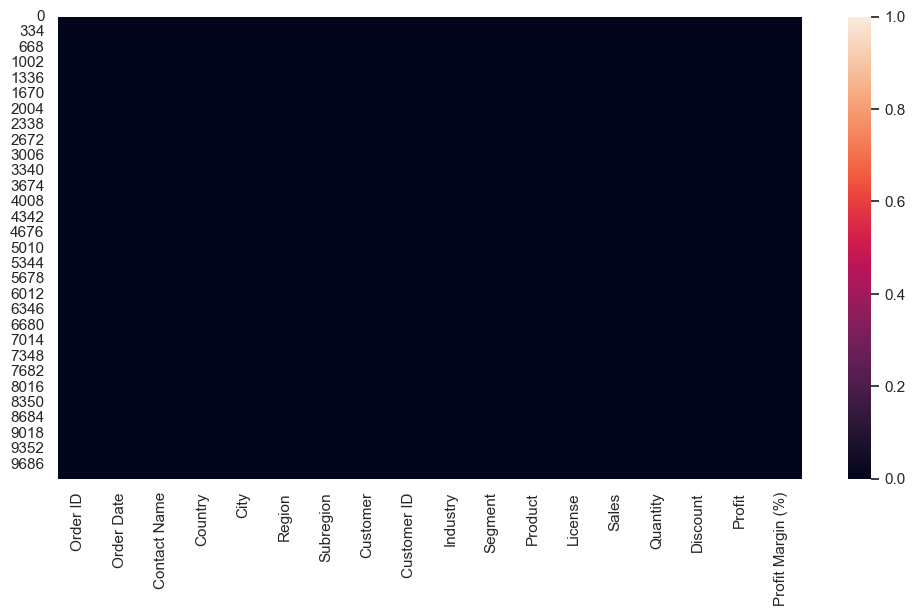

In [189]:
# Visualisasi Heatmap dari Missing Values
plt.figure(figsize = (12, 6))
sns.heatmap(data = df.isna(), vmin = 0, vmax = 1)
plt.show()

>**insight** : Tidak Ada **Missing Values** yang ditemukkan: Karena tidak adanya missing values yang terdeteksi dalam dataset, tidak diperlukan langkah tambahan untuk menangani data yang hilang, seperti imputasi (mengisi nilai yang hilang) atau penghapusan baris/kolom yang mengandung data hilang.

### **3.4 Duplicate**

Memeriksa duplikasi dalam sebuah dataset adalah langkah krusial dalam proses data cleansing. Duplikasi dapat menyebabkan bias. Dengan mengidentifikasi dan menghapus data yang berulang, kita dapat memastikan bahwa dataset yang digunakan mencerminkan representasi yang sebenarnya dari populasi yang dipelajari. Ini tidak hanya meningkatkan efisiensi pemrosesan data, tetapi juga memastikan bahwa setiap analisis yang dibuat berdasarkan data tersebut dapat diandalkan dan valid.

In [190]:
#Untuk mengetahui kolom mana saja yang duplikat
df[df.duplicated(keep=False)]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin (%)


>**insight** : Tidak ada Data yang Duplikat di dataset 

In [191]:
# untuk mengetahui apakah ada duplicat di kolom order id
df[df['Order ID'].duplicated(keep=False)].head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin (%)
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25
5,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694,29.00


>**Insight**: tidak ada ditemukan duplikat di kolom Order ID

### **3.5 Outliers**

Mencari dan memahami outliers adalah langkah penting dalam analisis data karena mereka dapat memberikan wawasan mendalam tentang data yang sedang dianalisis, serta membantu menghindari kesalahan dalam interpretasi statistik. Outliers bisa menunjukkan kesalahan yang perlu diperbaiki, anomali yang perlu diperhatikan, atau bahkan peluang baru yang perlu dieksplorasi.

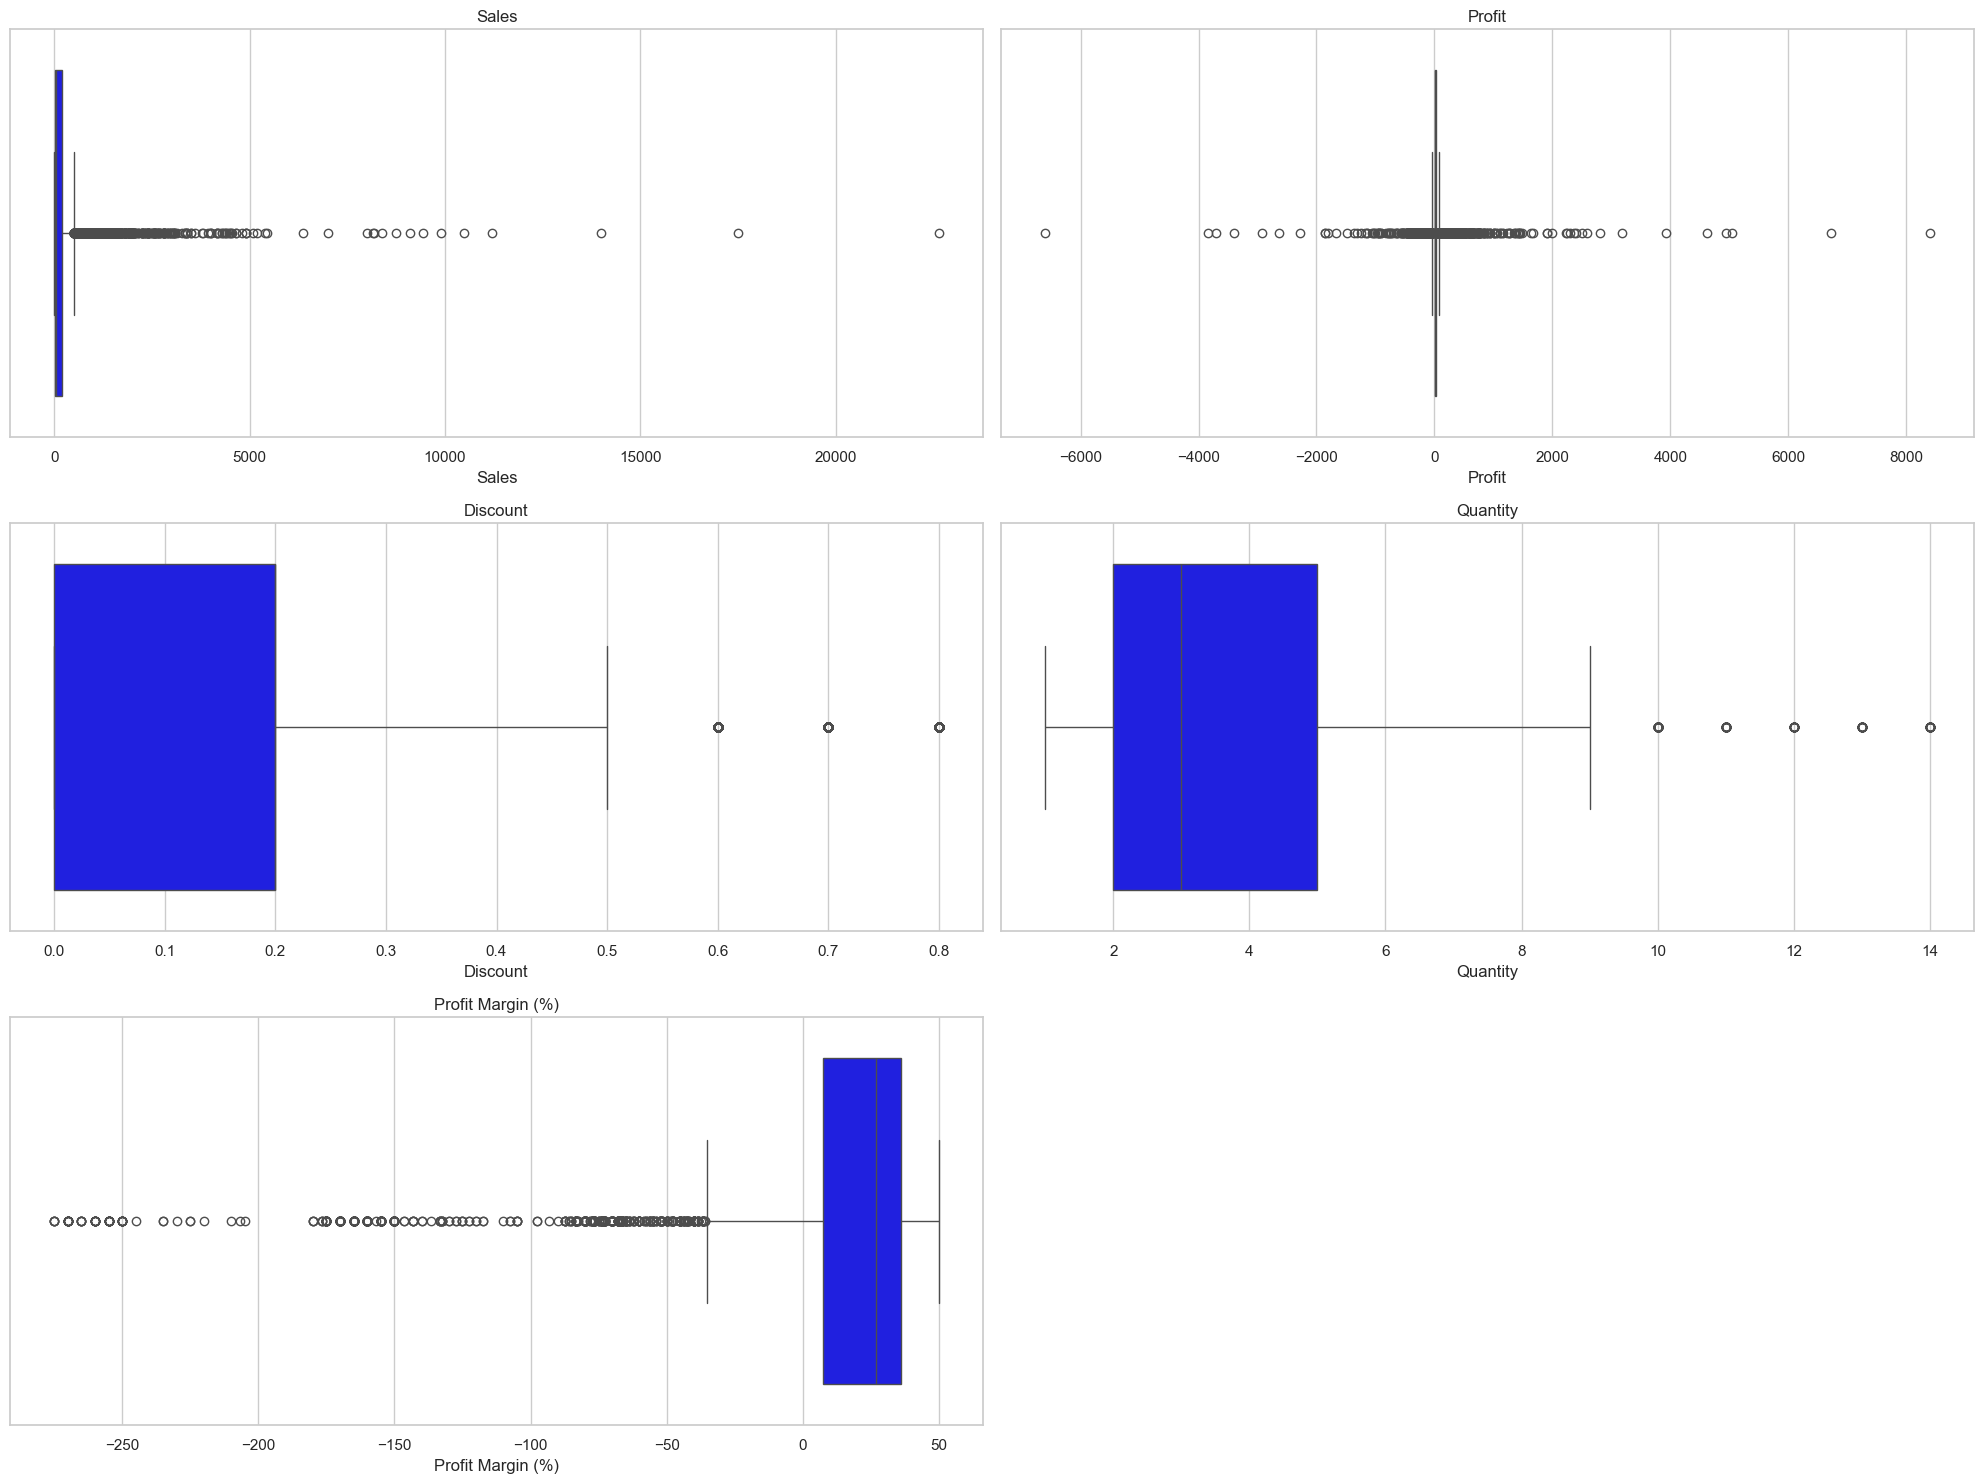

In [192]:
# Outliers
# Present Outliers with Box plot
feature = ['Sales', 'Profit', 'Discount', 'Quantity','Profit Margin (%)']
plt.figure(figsize=(20, 15))

for idx, col in enumerate(feature, start=1):
    plt.subplot(3, 2, idx)
    sns.boxplot(x=df[col],color='blue')
    plt.title(col)

plt.tight_layout()
plt.show()

>**insight** :
- `Sales` (Penjualan) Boxplot untuk penjualan menunjukkan bahwa sebagian besar data terpusat pada nilai yang relatif rendah, outliers pada nilai penjualan yang lebih tinggi. Hal ini menunjukkan adanya beberapa transaksi dengan nilai penjualan yang jauh lebih tinggi daripada mayoritas transaksi lainnya.
-  `Profit` (Keuntungan) distribusi keuntungan yang terlihat simetris tetapi dengan banyak outliers di kedua sisi, baik pada nilai negatif maupun positif. Ini mengindikasikan adanya transaksi rugi (profit negatif besar) dan transaksi untung (profit positif besar), meskipun sebagian besar data cenderung dekat dengan nol.
- `Discount` (Diskon) Plot untuk diskon menunjukkan bahwa sebagian besar transaksi diberikan diskon yang rendah, dengan outliers yang menunjukkan beberapa transaksi mendapatkan diskon yang sangat tinggi (hingga 80%). Sebagian besar data berada di sekitar diskon yang lebih kecil.
- `Quantity` (Kuantitas) menunjukkan distribusi yang cukup terpusat dengan beberapa outliers. Sebagian besar transaksi memiliki kuantitas yang rendah (antara 2 hingga 5 unit), sementara ada beberapa transaksi dengan kuantitas yang jauh lebih besar (hingga 14 unit).
- `Profit Margin (%)` Menunjukkan bahwa margin keuntungan sebagian besar berpusat pada nilai positif, tetapi ada outliers yang cukup signifikan pada nilai negatif. Ini mengindikasikan bahwa meskipun sebagian besar transaksi menghasilkan margin keuntungan positif, terdapat beberapa yang menyebabkan kerugian yang signifikan.

In [193]:
# Observing the data of Sales, Dicsount, Profit, Quantity and Profit Margin (%)
df[['Sales','Discount','Profit','Quantity','Profit Margin (%)']].describe()

,Sales,Discount,Profit,Quantity,Profit Margin (%)
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896,3.789574,12.031390
std,623.245101,0.206452,234.260108,2.225110,46.675436
min,0.444000,0.000000,-6599.978000,1.000000,-275.000000
25%,17.280000,0.000000,1.728750,2.000000,7.500000
50%,54.490000,0.200000,8.666500,3.000000,27.000000
75%,209.940000,0.200000,29.364000,5.000000,36.250000
max,22638.480000,0.800000,8399.976000,14.000000,50.000000


### **3.6 Identifikasi Outliers dalam Kolom Numerik**

>**Tujuan:**
Script ini bertujuan untuk mendeteksi outliers dalam kolom-kolom numerik tertentu (seperti `Sales`, `Quantity`, `Discount`, `Profit`, dan `Profit Margin (%)`) dengan menggunakan **metode IQR (Interquartile Range)**. Hasilnya diringkas dalam bentuk tabel yang mencakup batas bawah dan atas serta jumlah outliers yang terdeteksi untuk setiap kolom, sehingga memudahkan analisis lebih lanjut atau pengambilan keputusan terkait penanganan outliers.

In [194]:
# Dictionary to store outliers' information
outliers_info = {}

for column in ['Sales', 'Quantity', 'Discount', 'Profit','Profit Margin (%)']:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers = df[outliers_condition]

    # Store information in the dictionary
    outliers_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': outliers_condition.sum(),  # Count of outliers
        'outliers_indices': outliers.index.tolist()  # Indices of outliers
    }


# summary for outliers_summary
outliers_summary = {key: {'bounds': (value['lower_bound'], value['upper_bound']), 
                          'number_of_outliers': value['number_of_outliers']} 
                    for key, value in outliers_info.items()}

# Creating DataFrame from 'outliers_summary'
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')

# Splitting 'bounds' into 'lower_bound' and 'upper_bound' columns
outliers_summary_df[['lower_bound', 'upper_bound']] = outliers_summary_df['bounds'].apply(pd.Series)

# Dropping the original 'bounds' column
outliers_summary_df.drop('bounds', axis=1, inplace=True)

# Reordering the columns for a better view
outliers_summary_df = outliers_summary_df[['lower_bound', 'upper_bound', 'number_of_outliers']]

# Display DataFrame as a styled table
styled_table = outliers_summary_df.style.format('{:.0f}')
styled_table


,lower_bound,upper_bound,number_of_outliers
Sales,-272,499,1167
Quantity,-2,10,170
Discount,-0,0,856
Profit,-40,71,1881
Profit Margin (%),-36,79,952


>**insight** : berikut adalah interpretasi dari tabel yang menunjukkan informasi tentang outliers dalam dataset :

1. Penjualan (Sales):
- lower bound: -272
- upper bound: 499
- number_of_outliers: 1167

`Interpretasi`: Terdapat 1167 nilai outliers dalam kolom Penjualan, yang berada di luar rentang -272 hingga 499. Ini menunjukkan adanya transaksi dengan nilai penjualan yang sangat tinggi atau sangat rendah dibandingkan dengan nilai penjualan rata-rata dalam dataset.

2. Kuantitas (Quantity):
- lower bound: -2
- upper bound: 10
- number_of_outliers: 170

`Interpretasi`: Ada 170 nilai outliers dalam kolom Kuantitas. Nilai-nilai ini berada di luar rentang kuantitas yang biasanya diharapkan (antara -2 hingga 10). Hal ini menunjukkan bahwa terdapat pesanan dengan jumlah barang yang sangat tinggi atau sangat rendah dibandingkan dengan yang biasanya.

3. Diskon (Discount):
- lower bound: 0
- upper bound: 0
- number_of_outliers: 856

`Interpretasi`: Semua nilai dalam kolom Diskon yang berbeda dari 0 dianggap sebagai outliers. Dengan 856 outliers, ini menunjukkan bahwa sebagian besar transaksi memiliki nilai diskon yang tidak sesuai dengan ekspektasi (yaitu nilai selain 0).

4. Keuntungan (Profit):
- lower bound: -40
- upper bound: 71
- number_of_outliers: 1881

`Interpretasi`: Kolom Keuntungan memiliki number_of_outliers yang sangat besar, yaitu 1881 nilai yang berada di luar rentang -40 hingga 71. Ini menunjukkan bahwa keuntungan dari banyak transaksi sangat berbeda dari nilai keuntungan rata-rata yang diharapkan, baik itu sangat tinggi atau sangat rendah.

5. Profit Margin (%):
- lower bound: -36
- upper bound: 79
- number_of_outliers: 952

`Interpretasi`: Terdapat 952 outliers dalam kolom Profit Margin (%), yang menunjukkan bahwa terdapat banyak transaksi dengan Profit Margin (%) yang sangat berbeda dari yang biasanya diharapkan, baik itu sangat rendah atau sangat tinggi.

### **3.7 Mengecek Anomali pada selain Kolom Numerik**

In [195]:
# Country
df.groupby('Region')['Country'].unique().reset_index()

,Region,Country
0,AMER,"[United States, Canada, Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
1,APJ,"[Japan, Australia, Philippines, India, Singapore, New Zealand, South Korea, China, Indonesia, Taiwan]"
2,EMEA,"[Ireland, Germany, Sweden, Italy, Turkey, France, Luxembourg, United Kingdom, Spain, South Africa, Portugal, Belgium, Russia, Netherlands, Poland, Czech Republic, Saudi Arabia, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, Austria, Egypt, Denmark, Croatia, Qatar, Slovenia, Iceland]"


> menganalisis data berdasarkan wilayah (region) dan melihat daftar negara (country) yang terkait dengan masing-masing wilayah dalam dataset.

In [196]:
# Subregion
df.groupby('Subregion')['Country'].unique().reset_index()

,Subregion,Country
0,ANZ,"[Australia, New Zealand]"
1,APAC,"[Philippines, Singapore, South Korea, China, Indonesia, Taiwan]"
2,EU,[Italy]
3,EU-EAST,"[Russia, Czech Republic, Israel, Ukraine, Greece]"
4,EU-WEST,"[Germany, France, Luxembourg, Spain, Portugal, Belgium, Netherlands, Poland, Austria, Denmark, Croatia, Slovenia, Iceland]"
5,IND,[India]
6,JAPN,[Japan]
7,LATAM,"[Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
8,MEA,"[Turkey, South Africa, Saudi Arabia, United Arab Emirates, Egypt, Qatar]"
9,NAMER,"[United States, Canada]"


> mengidentifikasi dan memahami distribusi geografis negara-negara di dalam subwilayah tertentu

In [197]:
df.groupby('Subregion')['City'].count().reset_index()

,Subregion,City
0,ANZ,529
1,APAC,447
2,EU,110
3,EU-EAST,343
4,EU-WEST,1614
5,IND,149
6,JAPN,985
7,LATAM,1158
8,MEA,396
9,NAMER,2507


>  mengidentifikasi dan menghitung jumlah kota (City) yang tercatat di dataset untuk setiap subwilayah (Subregion).

In [198]:
df.groupby('Country')['City'].unique().reset_index()

,Country,City
0,Argentina,"[Córdoba, Buenos Aires, Mendoza, Rosario]"
1,Australia,"[Wollongong, Sydney, Canberra, Geelong, Melbourne, Adelaide, Brisbane, Hobart, Gold Coast, Perth]"
2,Austria,[Vienna]
3,Belgium,"[Brussels, Antwerp, Ghent]"
4,Brazil,"[Salvador, Rio de Janeiro, São Paulo, Manaus, Belo Horizonte, Brasília]"
5,Canada,"[Toronto, Vancouver, Hamilton, Ottawa, Montreal, Calgary, Quebec, Regina, Winnipeg, Victoria]"
6,Chile,"[Puente Alto, Santiago, Antofagasta]"
7,China,"[Shanghai, Shenzhen, Guangzhou, Beijing, Tianjin, Suzhou, Chengdu]"
8,Colombia,"[Bogotá, Medellín, Cali]"
9,Costa Rica,[San José]


> Mengidentifikasi dan mengelompokkan data berdasarkan negara (Country) dan kemudian mengekstrak daftar dari kota-kota (City) yang terkait dengan setiap negara.

In [199]:
df.groupby('Industry')['Product'].unique().reset_index()

,Industry,Product
0,Communications,"[ChatBot Plugin, Marketing Suite - Gold, OneView, Data Smasher, ContactMatcher, Support, Big Ol Database, SaaS Connector Pack, SaaS Connector Pack - Gold, FinanceHub, Site Analytics, Storage, Marketing Suite]"
1,Consumer Products,"[ContactMatcher, Site Analytics, SaaS Connector Pack, Data Smasher, Support, OneView, SaaS Connector Pack - Gold, ChatBot Plugin, FinanceHub, Marketing Suite, Big Ol Database, Marketing Suite - Gold, Storage, Alchemy]"
2,Energy,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, Support, Site Analytics, OneView, Storage, SaaS Connector Pack, Big Ol Database, ChatBot Plugin, Data Smasher, Alchemy, SaaS Connector Pack - Gold]"
3,Finance,"[SaaS Connector Pack, ChatBot Plugin, Site Analytics, ContactMatcher, OneView, SaaS Connector Pack - Gold, Marketing Suite, FinanceHub, Marketing Suite - Gold, Data Smasher, Support, Storage, Big Ol Database, Alchemy]"
4,Healthcare,"[OneView, ContactMatcher, FinanceHub, SaaS Connector Pack, Marketing Suite - Gold, SaaS Connector Pack - Gold, Site Analytics, Data Smasher, Support, Storage, Alchemy, ChatBot Plugin, Marketing Suite, Big Ol Database]"
5,Manufacturing,"[Marketing Suite - Gold, ContactMatcher, Data Smasher, FinanceHub, SaaS Connector Pack, Support, OneView, Storage, Marketing Suite, ChatBot Plugin, Site Analytics, Big Ol Database, SaaS Connector Pack - Gold, Alchemy]"
6,Misc,"[Support, OneView, Data Smasher, SaaS Connector Pack, ContactMatcher, SaaS Connector Pack - Gold, ChatBot Plugin, Site Analytics, Marketing Suite - Gold, FinanceHub, Storage, Big Ol Database, Alchemy, Marketing Suite]"
7,Retail,"[Marketing Suite - Gold, ChatBot Plugin, OneView, FinanceHub, Storage, Site Analytics, ContactMatcher, Data Smasher, SaaS Connector Pack, Support, Big Ol Database, SaaS Connector Pack - Gold, Marketing Suite, Alchemy]"
8,Tech,"[ContactMatcher, Marketing Suite, SaaS Connector Pack, SaaS Connector Pack - Gold, ChatBot Plugin, Marketing Suite - Gold, Data Smasher, Support, FinanceHub, Site Analytics, Storage, Big Ol Database, OneView, Alchemy]"
9,Transportation,"[ContactMatcher, SaaS Connector Pack, Marketing Suite - Gold, Data Smasher, FinanceHub, ChatBot Plugin, Site Analytics, Support, Big Ol Database, OneView, Storage, Alchemy, Marketing Suite, SaaS Connector Pack - Gold]"


> Mengidentifikasi produk-produk yang terkait dengan setiap industri dalam dataset.

In [200]:
df.groupby('Segment')['Product'].unique().reset_index()

,Segment,Product
0,Enterprise,"[OneView, ContactMatcher, Support, SaaS Connector Pack - Gold, Marketing Suite, FinanceHub, Site Analytics, Marketing Suite - Gold, SaaS Connector Pack, Data Smasher, ChatBot Plugin, Storage, Big Ol Database, Alchemy]"
1,SMB,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, SaaS Connector Pack, ChatBot Plugin, Site Analytics, OneView, Support, Data Smasher, SaaS Connector Pack - Gold, Storage, Big Ol Database, Alchemy]"
2,Strategic,"[FinanceHub, ChatBot Plugin, OneView, Site Analytics, SaaS Connector Pack, Marketing Suite - Gold, Data Smasher, ContactMatcher, Storage, SaaS Connector Pack - Gold, Support, Marketing Suite, Big Ol Database, Alchemy]"


> Mengidentifikasi produk-produk yang terkait dengan setiap segmen pelanggan dalam dataset.

In [201]:
df.groupby('Segment')['Industry'].unique().reset_index()

,Segment,Industry
0,Enterprise,"[Healthcare, Misc, Finance, Energy, Retail, Manufacturing, Consumer Products, Transportation, Tech, Communications]"
1,SMB,"[Energy, Finance, Tech, Manufacturing, Retail, Consumer Products, Healthcare, Communications, Transportation, Misc]"
2,Strategic,"[Energy, Retail, Consumer Products, Manufacturing, Tech, Finance, Transportation, Healthcare, Communications, Misc]"


> Mengidentifikasi industri-industri yang terkait dengan setiap segmen pelanggan dalam dataset.

### **3.8 Normality Checking/ Distribution**

> Uji normalitas data adalah uji statistik yang bertujuan untuk menilai apakah data yang diamati memiliki distribusi normal atau tidak [(Ciputra, 2023)](https://informatika.ciputra.ac.id/2022/12/uji-normalitas-dan-penelitian-kuantitatif/#:~:text=Uji%20normalitas%20adalah%20uji%20statistik,memiliki%20distribusi%20normal%20atau%20tidak).

**Tujuannya** adalah untuk memastikan apakah asumsi normalitas terpenuhi, sehingga metode statistik yang digunakan dapat memberikan hasil yang dapat diandalkan. Jika data tidak normal, mungkin perlu dilakukan transformasi data atau digunakan metode statistik yang tidak bergantung pada asumsi normalitas.



D'Agostino's K-squared Test for Normality (Sales):
  - p-value: 0.0
  - The distribution of Sales is likely not normal.


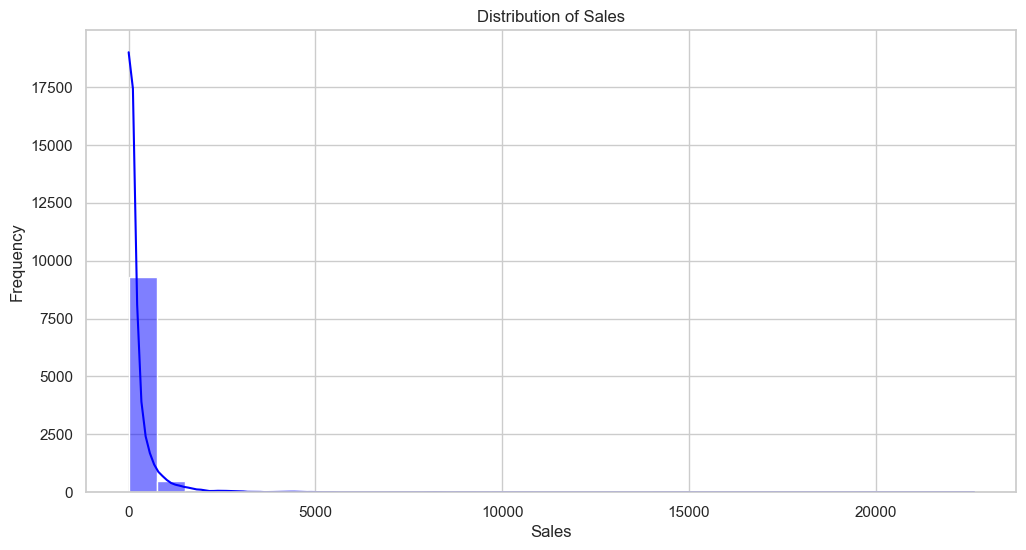


D'Agostino's K-squared Test for Normality (Quantity):
  - p-value: 0.0
  - The distribution of Quantity is likely not normal.


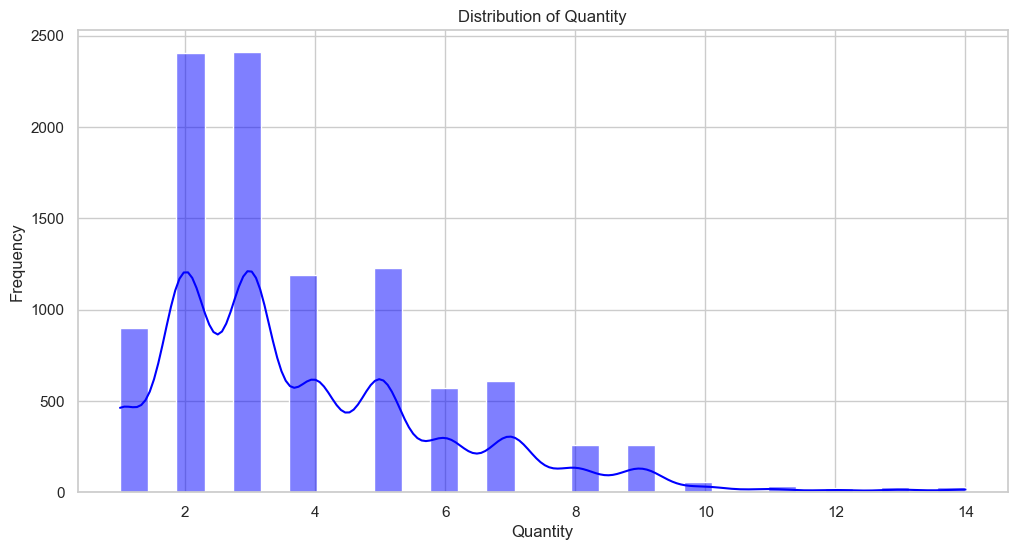


D'Agostino's K-squared Test for Normality (Discount):
  - p-value: 0.0
  - The distribution of Discount is likely not normal.


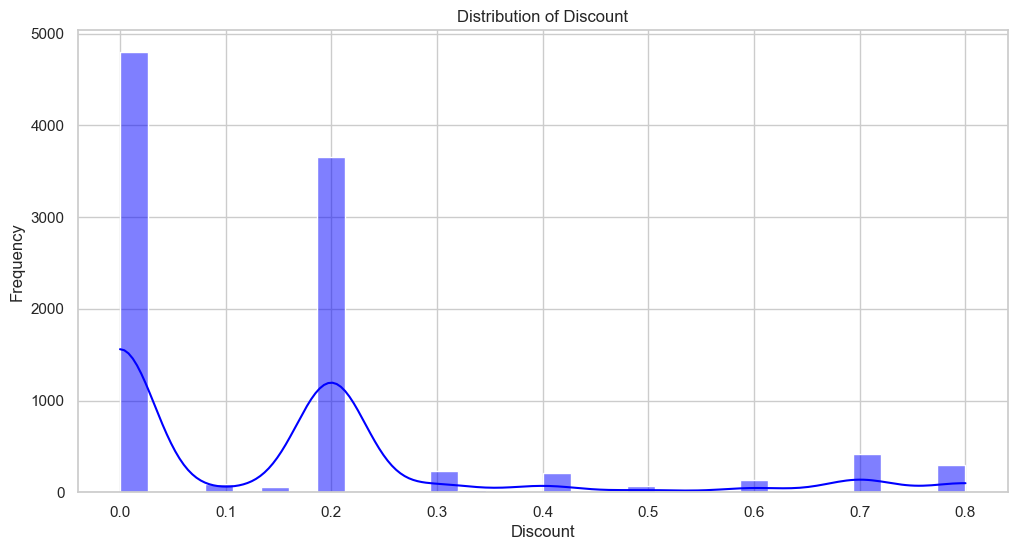


D'Agostino's K-squared Test for Normality (Profit):
  - p-value: 0.0
  - The distribution of Profit is likely not normal.


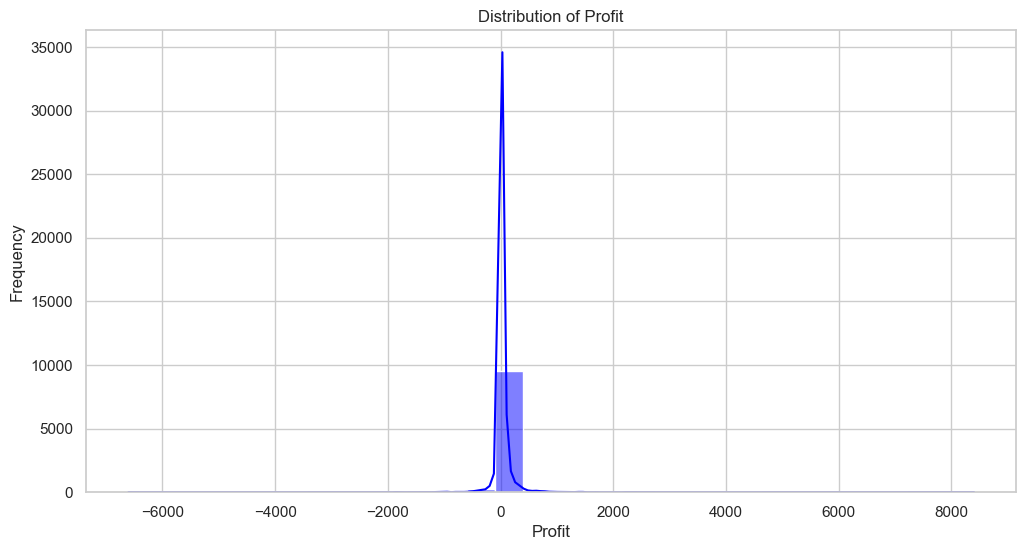


D'Agostino's K-squared Test for Normality (Profit Margin (%)):
  - p-value: 0.0
  - The distribution of Profit Margin (%) is likely not normal.


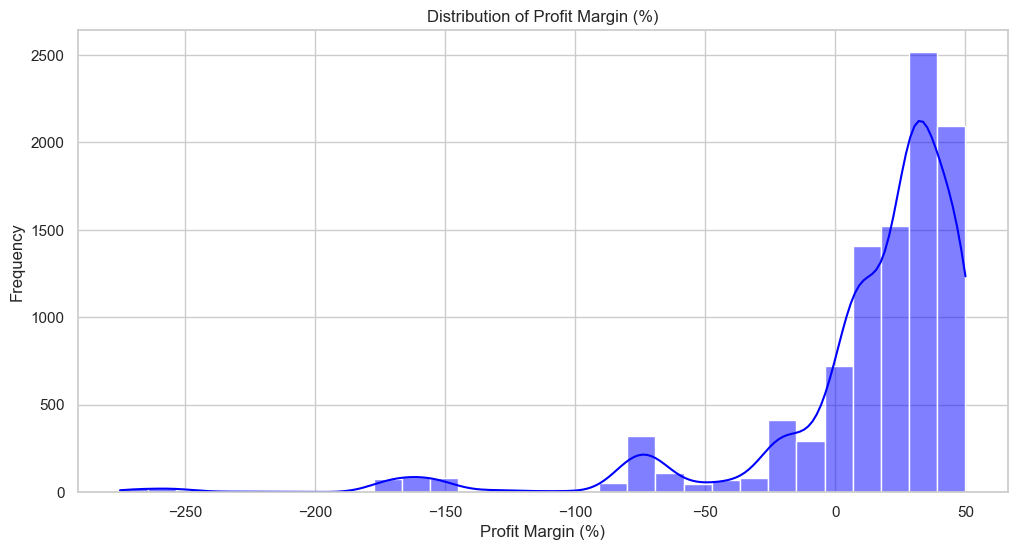

In [202]:
# Daftar kolom yang ingin diuji
columns_of_interest = ['Sales', 'Quantity', 'Discount', 'Profit','Profit Margin (%)']
alpha = 0.05

for column_of_interest in columns_of_interest:
    # Ekstrak kolom untuk analisis
    data = df[column_of_interest]

    # D'Agostino's K-squared test for normality
    stat, p_value = normaltest(data)

    # Cetak hasil D'Agostino's K-squared test
    print(f"\nD'Agostino's K-squared Test for Normality ({column_of_interest}):")
    print(f"  - p-value: {p_value}")

    # Cek apakah p-value kurang dari tingkat signifikansi
    if p_value > alpha:
        print(f"  - The distribution of {column_of_interest} is likely normal.")
    else:
        print(f"  - The distribution of {column_of_interest} is likely not normal.")

    # Visualisasikan distribusi dengan histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(data, kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column_of_interest}')
    plt.xlabel(column_of_interest)
    plt.ylabel('Frequency')
    plt.show()

> Untuk dataset dengan 9994 baris, **D’Agostino’s K-squared Test** merupakan pilihan terbaik dalam uji normalitas karena mereka lebih kuat dan sensitif dalam mendeteksi deviasi dari normalitas dalam dataset besar.

>**insight** : Interpretasi Hasil Uji Normalitas:

1. `Sales`: p-value: **lebih kecil dari 0.05**, distribusi Sales **tidak normal**. Ini menunjukkan adanya variasi yang besar dalam penjualan yang tidak mengikuti pola distribusi normal.

2. `Quantity`: p-value: **lebih kecil dari 0.05**, distribusi jumlah Quantity **tidak normal**. Ini mengindikasikan bahwa jumlah barang yang dipesan cenderung bervariasi secara tidak teratur dan tidak mengikuti distribusi normal.

3. `Discount`: p-value: **lebih kecil dari 0.05**, distribusi Discount **tidak normal**. Ini mungkin menunjukkan bahwa kebanyakan Discount diberikan dalam cara yang tidak merata, misalnya banyak Discount yang sangat rendah atau sangat tinggi.

4. `Profit`: p-value: **lebih kecil dari 0.05**, distribusi Profit **tidak normal**. Ini menunjukkan bahwa Profit bervariasi secara signifikan, mungkin dengan banyak keuntungan yang sangat rendah atau sangat tinggi.

5. `Profit Margin (%)`: p-value: **lebih kecil dari 0.05**, distribusi Profit Margin  **tidak normal**. Ini bisa berarti bahwa Profit Margin sangat bervariasi, yang mungkin disebabkan oleh strategi harga atau kondisi pasar yang berbeda.

### **3.9 Ringkasan Deskriptif dari DataFrame**

> Ringkasan ini mencakup informasi penting seperti nama kolom, tipe data, jumlah nilai kosong (missing values), jumlah nilai unik, serta contoh tiga nilai unik dari setiap kolom.

In [203]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(3).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(9994, 18)


,dataFeatures,dataType,null,unique,uniqueSample
0,Order ID,object,0,5009,"[EMEA-2023-113453, APJ-2020-151078, AMER-2020-103401]"
1,Order Date,datetime64[ns],0,1237,"[2021-12-11T00:00:00.000000000, 2020-03-15T00:00:00.000000000, 2021-06-14T00:00:00.000000000]"
2,Contact Name,object,0,793,"[Alison Davidson, Stewart Hart, Paul Martin]"
3,Country,object,0,48,"[Singapore, Brazil, Slovenia]"
4,City,object,0,262,"[Los Angeles, Paris, Hiroshima]"
5,Region,object,0,3,"[AMER, EMEA, APJ]"
6,Subregion,object,0,12,"[EU-WEST, MEA, EU-EAST]"
7,Customer,object,0,99,"[Safeway, Microsoft, HonHai Precision Industry]"
8,Customer ID,object,0,99,"[1076, 1024, 1075]"
9,Industry,object,0,10,"[Transportation, Manufacturing, Tech]"


In [204]:
# Saving Data-After-Cleaned
df.to_excel('SaaS-Sales-Data-After-Cleaned.xlsx', index=False)

## **4. Analisis Data**

---

#### **4.1 Analisis Kinerja Penjualan Perusahaan**
Analisis ini bertujuan untuk mengevaluasi kinerja penjualan perusahaan dengan fokus pada faktor-faktor utama yang mempengaruhi penjualan dan profit, terutama dalam konteks profit negatif. Penelitian ini mencakup dampak diskon terhadap penjualan, performa berbagai produk, dan tren penjualan sepanjang waktu. Tujuannya adalah untuk mengidentifikasi area yang perlu ditingkatkan dan memberikan rekomendasi strategis yang dapat diimplementasikan untuk meningkatkan profitabilitas perusahaan.

##### **4.1.1 Analisis Dampak Diskon terhadap Penjualan dan Profit Margin (%)**
Analisis ini menganalisis bagaimana diskon mempengaruhi penjualan dan Profit Margin (%) dengan mengelompokkan data penjualan berdasarkan tingkat diskon yang diberikan.

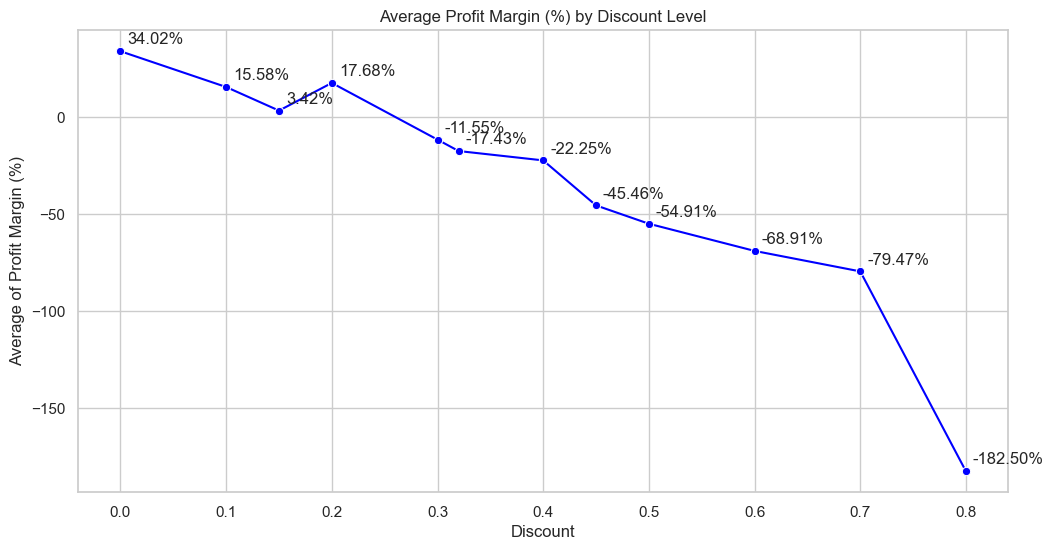

In [205]:
# Rata-rata profit berdasarkan diskon
average_profit_by_discount = df.groupby('Discount')['Profit Margin (%)'].mean()

# Visualisasi
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=average_profit_by_discount.index, y=average_profit_by_discount.values, marker='o', color='blue')

# Menambahkan anotasi pada setiap titik
for x, y in zip(average_profit_by_discount.index, average_profit_by_discount.values):
    ax.annotate(f'{y:.2f}%', xy=(x, y), xytext=(5, 5), textcoords='offset points')

plt.title('Average Profit Margin (%) by Discount Level')
plt.xlabel('Discount')
plt.ylabel('Average of Profit Margin (%)')
plt.grid(True)
plt.show()


>**Interpretasi :** Grafik ini menunjukkan hubungan antara diskon dan rata-rata margin profit. Dari visualisasi ini, terlihat bahwa **diskon yang lebih besar sering kali berkorelasi dengan penurunan profit, yang bisa jadi disebabkan oleh margin keuntungan yang tergerus**. Dalam beberapa kasus, diskon tinggi mungkin menarik volume penjualan yang lebih besar, tetapi juga bisa mengakibatkan profit negatif jika tidak diimbangi dengan peningkatan volume yang cukup untuk menutupi pengurangan margin.

>**Insight dan Masukan:** Diskon harus diberikan secara strategis, dengan mempertimbangkan dampaknya terhadap margin keuntungan. **Saya merekomendasikan penggunaan diskon yang lebih selektif dan mempertimbangkan promosi yang lebih kreatif, seperti bundling atau penawaran nilai tambah, untuk menjaga margin keuntungan tetap sehat.**

##### **4.2.2 Mengidentifikasi Kategori Produk dengan Profit Negatif**


>**a. Harga Satuan Jual Produk:**

Tujuan utama dari menghitung dan menganalisis Harga Satuan Jual Produk adalah untuk memahami dan mengoptimalkan strategi harga yang digunakan perusahaan.

In [206]:
# Mengelompokkan data berdasarkan produk untuk menghitung total penjualan dan jumlah unit terjual
product_sales = df.groupby('Product').agg({
    'Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Menghitung harga satuan jual (unit price)
product_sales['Unit_Price'] = product_sales['Sales'] / product_sales['Quantity']

# Mengurutkan hasil berdasarkan harga satuan jual dari tinggi ke rendah
product_sales = product_sales.sort_values(by='Unit_Price', ascending=False).reset_index(drop=True)
product_sales


,Product,Sales,Quantity,Unit_Price
0,Alchemy,149528.0300,234,639.008675
1,Big Ol Database,189238.6310,440,430.087798
2,Marketing Suite,114879.9963,868,132.350226
3,Site Analytics,330007.0540,3289,100.336593
4,FinanceHub,340935.4150,3756,90.770877
5,Marketing Suite - Gold,223843.6080,3158,70.881446
6,OneView,107532.1610,1729,62.193268
7,ContactMatcher,410378.2650,7215,56.878484
8,Data Smasher,167380.3180,2976,56.243386
9,SaaS Connector Pack,91705.1640,3563,25.738188


> **Insight :** Menghitung harga satuan jual produk memberikan wawasan penting yang dapat digunakan untuk mengoptimalkan harga, meningkatkan profitabilitas, dan memperkuat posisi produk di pasar. Ini adalah langkah strategis dalam manajemen produk dan pemasaran yang memungkinkan perusahaan untuk mengambil keputusan yang lebih baik mengenai penetapan harga dan promosi produk.

> **b. Rata-rata Margin Profit untuk Setiap Produk**

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19020\1473531887.py:8: UserWarning: 
The palette list has fewer values (12) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='Profit Margin (%)', y='Product', data=margin_summary, palette=colors)


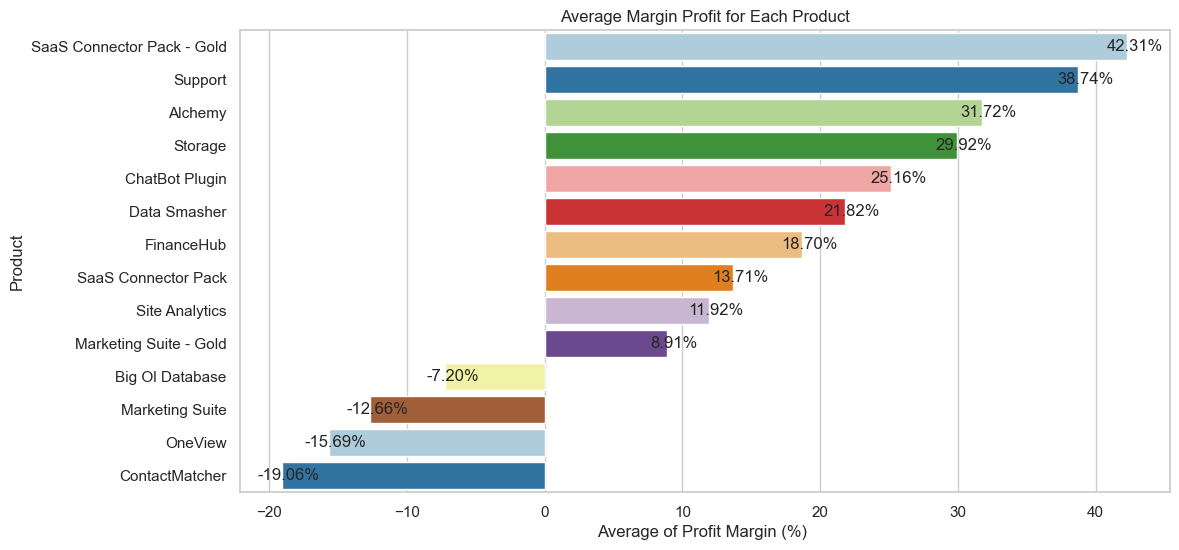

In [207]:
# segmentasi atau mengelompokkan produk 
Product_margin = df.groupby('Product')['Profit Margin (%)'].mean()
margin_summary = Product_margin.sort_values(ascending=False).reset_index()

# visualisasi
colors = sns.color_palette("Paired")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Profit Margin (%)', y='Product', data=margin_summary, palette=colors)

# Annotate
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%',  
                (p.get_width(), p.get_y() + p.get_height() / 2),  
                ha='center', va='center', 
                xytext=(5, 0),
                textcoords='offset points')

plt.title('Average Margin Profit for Each Product')
plt.xlabel('Average of Profit Margin (%) ')
plt.ylabel('Product')
plt.xticks()
plt.show()

> **Interpretasi :**
1. Produk dengan Margin Profit Tinggi:
- Produk seperti SaaS Connector Pack - Gold (42.31%), Support (38.74%), dan Alchemy (31.72%) menunjukkan margin profit yang sangat tinggi. Ini menunjukkan bahwa produk-produk ini memberikan kontribusi yang signifikan terhadap profit perusahaan per unit yang terjual.

2. Produk dengan Margin Profit Negatif:
- Di sisi lain, ada produk seperti ContactMatcher (-19.06%), OneView (-15.69%), dan Marketing Suite (-12.66%) yang menunjukkan margin profit negatif. Ini berarti produk-produk ini beroperasi dengan kerugian, di mana biaya yang dikeluarkan untuk memproduksi dan menjual produk lebih besar daripada pendapatan yang dihasilkan.

>**Insight :**
1. Produk dengan Margin Profit Tinggi:
- Fokuskan upaya pemasaran dan penjualan pada produk dengan margin profit tinggi seperti SaaS Connector Pack - Gold dan Support. Ini bisa membantu meningkatkan keseluruhan profitabilitas perusahaan. Produk-produk ini mungkin berada di pasar premium atau memiliki keunggulan kompetitif yang signifikan.

2. Produk dengan Margin Profit Negatif:
- Produk seperti ContactMatcher dan OneView perlu dievaluasi ulang. Mungkin diperlukan revisi harga, pengurangan biaya produksi, atau bahkan mempertimbangkan apakah produk ini layak untuk terus dipertahankan di pasar. Jika biaya tidak bisa dikurangi, perusahaan mungkin perlu mempertimbangkan untuk menghentikan produk ini atau mengubah strateginya secara signifikan.

>**Masukkan:**

- Dengan memanfaatkan visualisasi ini, perusahaan dapat membuat keputusan yang lebih baik terkait strategi produk dan alokasi sumber daya. **Fokus pada produk yang menguntungkan sambil memperbaiki atau menghentikan produk yang tidak menguntungkan akan membantu dalam meningkatkan efisiensi dan profitabilitas keseluruhan perusahaan.**

>**c. Rasio Biaya terhadap Penjualan (Cost to Sales Ratio) per Produk:**

In [208]:
# Menghitung total biaya per produk
df['Cost'] = df['Sales'] - df['Profit']

# Mengelompokkan data berdasarkan produk dan menghitung total penjualan, profit, dan biaya
product_costs = df.groupby('Product').agg({
    'Sales': 'mean',
    'Profit': 'mean',
    'Cost': 'mean'
}).reset_index()

# Menghitung rasio biaya terhadap penjualan 
product_costs['Cost_to_Sales_Ratio'] = (product_costs['Cost'] / product_costs['Sales']) * 100

# Mengurutkan berdasarkan rasio biaya terhadap penjualan dari kecil ke besar
product_costs = product_costs.sort_values(by='Cost_to_Sales_Ratio', ascending=False).reset_index(drop=True)
product_costs


,Product,Sales,Profit,Cost,Cost_to_Sales_Ratio
0,Marketing Suite,503.859633,-15.230509,519.090142,103.022768
1,Big Ol Database,1645.553313,29.432669,1616.120644,98.211382
2,ContactMatcher,222.789503,6.784084,216.005420,96.954936
3,FinanceHub,347.538649,32.758838,314.779811,90.574045
4,Marketing Suite - Gold,264.590553,25.152277,239.438276,90.493887
5,Site Analytics,371.211534,50.073938,321.137597,86.510673
6,SaaS Connector Pack,95.825668,13.645918,82.179750,85.759642
7,OneView,230.755710,38.922758,191.832952,83.132483
8,ChatBot Plugin,34.068834,8.200737,25.868097,75.928917
9,Data Smasher,215.974604,54.111788,161.862816,74.945300


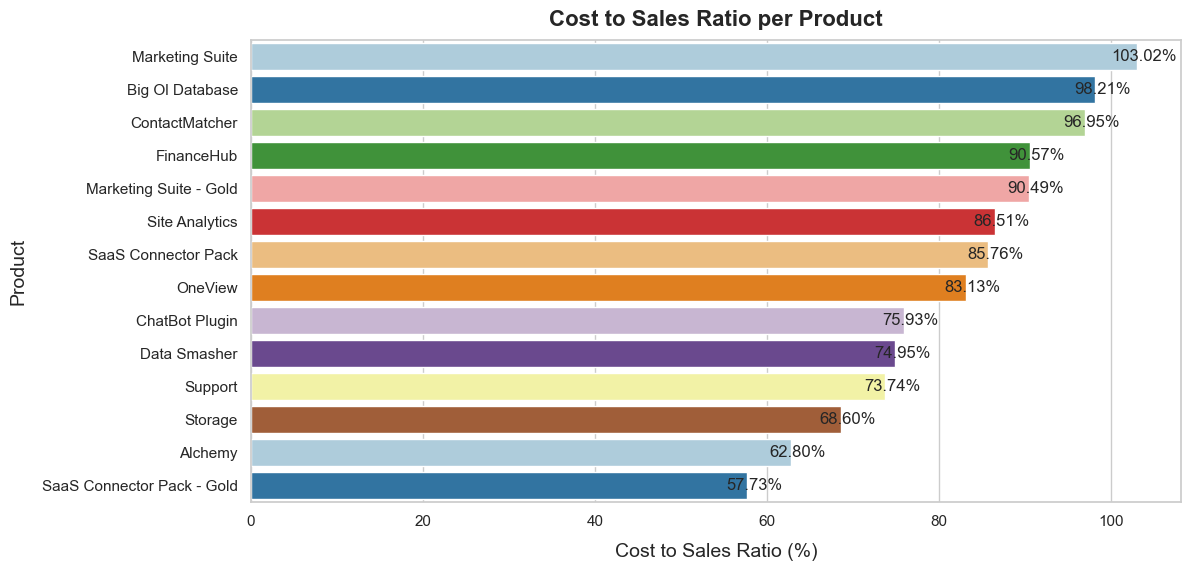

In [209]:
# Visualisasi rasio biaya terhadap penjualan
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=product_costs, y='Product', x='Cost_to_Sales_Ratio', palette='Paired')
    
# Annotate
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%',  
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='center', va='center',  
                xytext=(5, 0),  
                textcoords='offset points')

plt.title('Cost to Sales Ratio per Product', size=16, pad=10, fontweight='bold')
plt.xlabel('Cost to Sales Ratio (%)', size=14, labelpad=10)
plt.ylabel('Product', size=14, labelpad=10)
plt.show()

>**Interpretasi :**
1. Produk dengan Rasio Biaya terhadap Penjualan Tinggi:
- Marketing Suite memiliki rasio biaya terhadap penjualan tertinggi, yaitu 103.02%, yang menunjukkan bahwa biaya yang dikeluarkan untuk memproduksi dan menjual produk ini lebih besar dari pendapatan yang dihasilkan. Dengan kata lain, produk ini beroperasi dengan kerugian.
- Big Ol Database dan ContactMatcher juga menunjukkan rasio yang tinggi, masing-masing sebesar 98.21% dan 96.95%, yang mendekati titik impas atau sedikit di atasnya.

2. Produk dengan Rasio Biaya terhadap Penjualan Rendah:
- SaaS Connector Pack - Gold memiliki rasio biaya terhadap penjualan terendah, yaitu 57.73%, yang menunjukkan efisiensi tinggi dalam biaya dibandingkan dengan penjualan yang dihasilkan. Ini menunjukkan bahwa produk ini sangat menguntungkan, dengan biaya yang jauh lebih rendah dibandingkan dengan pendapatan yang dihasilkan.
- Alchemy dan Storage juga menunjukkan rasio biaya yang relatif rendah, masing-masing 62.80% dan 68.60%, yang menandakan profitabilitas yang baik.

>**Insight :**
1. Produk dengan Rasio Biaya Tinggi:
- Produk dengan rasio biaya yang tinggi, seperti Marketing Suite dan Big Ol Database, memerlukan analisis lebih lanjut untuk memahami mengapa biaya begitu tinggi. Mungkin ada peluang untuk mengurangi biaya produksi atau mempertimbangkan penyesuaian harga jual untuk meningkatkan profitabilitas.

2. Produk dengan Rasio Biaya Rendah:
- Produk dengan rasio biaya rendah, seperti SaaS Connector Pack - Gold, adalah pilar penting profitabilitas perusahaan. Perusahaan bisa mempertimbangkan untuk memperluas penjualan produk-produk ini atau bahkan meningkatkan investasi dalam pemasaran untuk produk-produk yang sangat menguntungkan ini.

>**Masukkan :**
- Dengan visualisasi ini memberikan pandangan yang jelas tentang seberapa efisien setiap produk dalam menghasilkan keuntungan terhadap biaya yang dikeluarkan. **Dengan fokus pada pengurangan biaya untuk produk dengan rasio tinggi dan memperkuat strategi pemasaran untuk produk dengan rasio rendah**, perusahaan dapat mengoptimalkan profitabilitas secara keseluruhan. Analisis ini sangat penting untuk pengambilan keputusan strategis di pasar yang dinamis.

> **Insight dan Rekomendasi Keseluruhan:**

1. `Optimalkan Produk dengan Kinerja Baik:`
- SaaS Connector Pack - Gold, Support, Alchemy, dan Storage harus diprioritaskan dalam strategi pemasaran dan penjualan karena mereka memberikan margin profit tinggi dengan biaya rendah. Ini bisa melibatkan peningkatan upaya pemasaran, memperluas distribusi, atau bahkan mempertimbangkan peningkatan harga dengan mempertahankan keunggulan biaya.

2. `Evaluasi Produk dengan Kinerja Buruk:`
- Produk seperti Marketing Suite, OneView, dan ContactMatcher memerlukan evaluasi strategis. Jika biaya tidak dapat dikurangi atau harga tidak dapat dinaikkan, mungkin perlu dipertimbangkan untuk menghentikan produk ini atau mengarahkan ulang sumber daya ke produk yang lebih menguntungkan.

3. `Fokus pada Efisiensi Operasional:`
- Untuk produk dengan rasio biaya tinggi namun margin profit positif seperti Marketing Suite - Gold, FinanceHub, dan Site Analytics, fokus harus diarahkan pada pengurangan biaya operasional. Ini bisa melalui optimasi proses produksi, negosiasi dengan pemasok, atau otomatisasi.

##### **4.1.3 Analisis Tren Penjualan dari Waktu ke Waktu**
Tren penjualan dianalisis berdasarkan bulan dan tahun untuk mengidentifikasi fluktuasi musiman dan melihat bagaimana penjualan berubah seiring waktu.

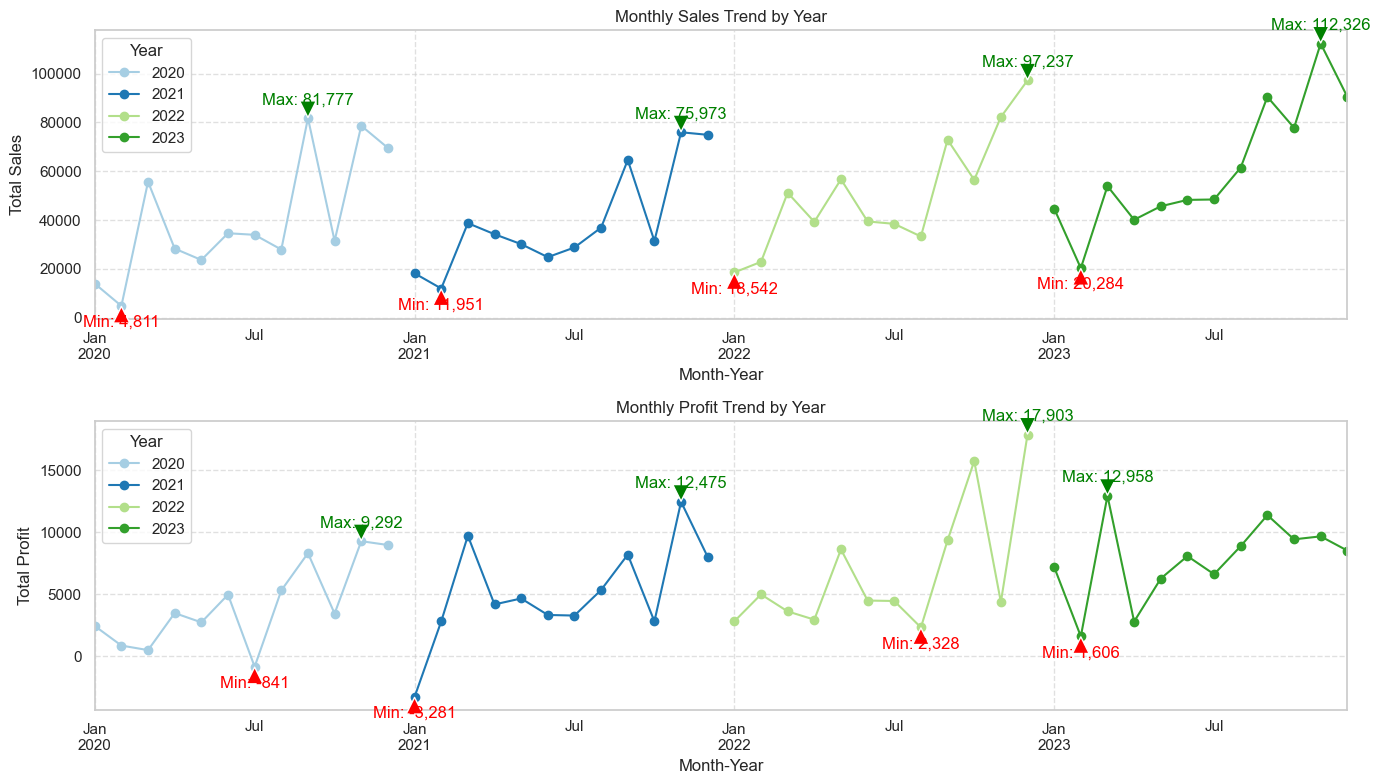

In [210]:
# Menambahkan kolom OrderMonth dan Year
df['OrderMonth'] = df['Order Date'].dt.to_period('M')
df['Year'] = df['Order Date'].dt.year

# Menghitung total penjualan dan profit bulanan per tahun
monthly_sales_profit_by_year = df.groupby(['Year', 'OrderMonth'])[['Sales', 'Profit']].sum().unstack('Year')

# Visualisasi penjualan dan profit bulanan per tahun
plt.figure(figsize=(14, 8))

# Mengatur palet warna
sns.set_palette("Paired")

# Plot untuk Penjualan
plt.subplot(2, 1, 1)
ax1 = monthly_sales_profit_by_year['Sales'].plot(ax=plt.gca(), marker='o')
plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.6)

# Menambahkan anotasi untuk titik maksimum dan minimum pada plot penjualan
for year in monthly_sales_profit_by_year['Sales'].columns:
    max_value = monthly_sales_profit_by_year['Sales'][year].max()
    min_value = monthly_sales_profit_by_year['Sales'][year].min()
    max_idx = monthly_sales_profit_by_year['Sales'][year].idxmax()
    min_idx = monthly_sales_profit_by_year['Sales'][year].idxmin()
    
    # Annotate Max
    ax1.annotate(f'Max: {max_value:,.0f}', 
                 xy=(max_idx.to_timestamp(), max_value), 
                 xytext=(0,10), textcoords='offset points',
                 arrowprops=dict(facecolor='green', shrink=0.05),
                 ha='center', color='green')
    
    # Annotate Min
    ax1.annotate(f'Min: {min_value:,.0f}', 
                 xy=(min_idx.to_timestamp(), min_value), 
                 xytext=(0,-15), textcoords='offset points',
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 ha='center', color='red')

# Plot untuk Profit
plt.subplot(2, 1, 2)
ax2 = monthly_sales_profit_by_year['Profit'].plot(ax=plt.gca(), marker='o')
plt.title('Monthly Profit Trend by Year')
plt.xlabel('Month-Year')
plt.ylabel('Total Profit')
plt.grid(True, linestyle='--', alpha=0.6)

# Menambahkan anotasi untuk titik maksimum dan minimum pada plot profit
for year in monthly_sales_profit_by_year['Profit'].columns:
    max_value = monthly_sales_profit_by_year['Profit'][year].max()
    min_value = monthly_sales_profit_by_year['Profit'][year].min()
    max_idx = monthly_sales_profit_by_year['Profit'][year].idxmax()
    min_idx = monthly_sales_profit_by_year['Profit'][year].idxmin()
    
    # Annotate Max
    ax2.annotate(f'Max: {max_value:,.0f}', 
                 xy=(max_idx.to_timestamp(), max_value), 
                 xytext=(0,10), textcoords='offset points',
                 arrowprops=dict(facecolor='green', shrink=0.05),
                 ha='center', color='green')
    
    # Annotate Min
    ax2.annotate(f'Min: {min_value:,.0f}', 
                 xy=(min_idx.to_timestamp(), min_value), 
                 xytext=(0,-15), textcoords='offset points',
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 ha='center', color='red')

plt.tight_layout()
plt.show()


> **Interpretasi :**
1. `Sales`
- Fluktuasi Sales:
Grafik penjualan bulanan menunjukkan titik-titik maksimum yang mungkin terjadi selama musim puncak seperti liburan atau kampanye promosi besar. Sebaliknya, titik minimum mungkin terjadi selama periode yang lebih lambat secara musiman.
- **Insight**: Mengetahui kapan penjualan mencapai puncak dan lembah dapat membantu perusahaan mempersiapkan inventaris dan tenaga kerja dengan lebih baik, serta merencanakan promosi untuk memaksimalkan penjualan selama periode puncak.

2. `Profit`
- Fluktuasi Profit:
Grafik profit bulanan memperlihatkan bagaimana profit berfluktuasi sepanjang tahun. Titik-titik maksimum mungkin terjadi saat margin keuntungan tinggi, sementara titik minimum dapat menunjukkan bulan dengan pengeluaran tinggi atau diskon besar yang mengurangi profitabilitas.
- **Insight**: Menganalisis bulan dengan profit rendah bisa memberikan wawasan untuk meninjau kembali strategi diskon, biaya, atau efisiensi operasional. Perusahaan harus mempertimbangkan untuk mengurangi pengeluaran atau meningkatkan margin selama bulan-bulan ini.

>**Masukkan :**
Dengan memahami kapan penjualan dan profit mencapai titik tertinggi dan terendah, perusahaan dapat mengembangkan strategi yang lebih baik untuk mengoptimalkan sumber daya dan meningkatkan profitabilitas sepanjang tahun.
- Strategi Promosi: Pertimbangkan untuk melakukan promosi besar-besaran pada paruh kedua tahun ketika penjualan dan profit cenderung meningkat.
- Pengendalian Biaya: Tinjau ulang biaya operasional dan produksi, terutama untuk produk dengan margin keuntungan rendah, untuk memastikan profitabilitas meningkat seiring dengan penjualan.
- Analisis Musiman: Harapannya dilakukan analisis lebih mendalam mengenai tren musiman dan sesuaikan strategi penjualan, pemasaran, dan produksi untuk mengoptimalkan kinerja sepanjang tahun.

##### **4.1.3 Analisis Penjualan berdasarkan Waktu (Order Date)**

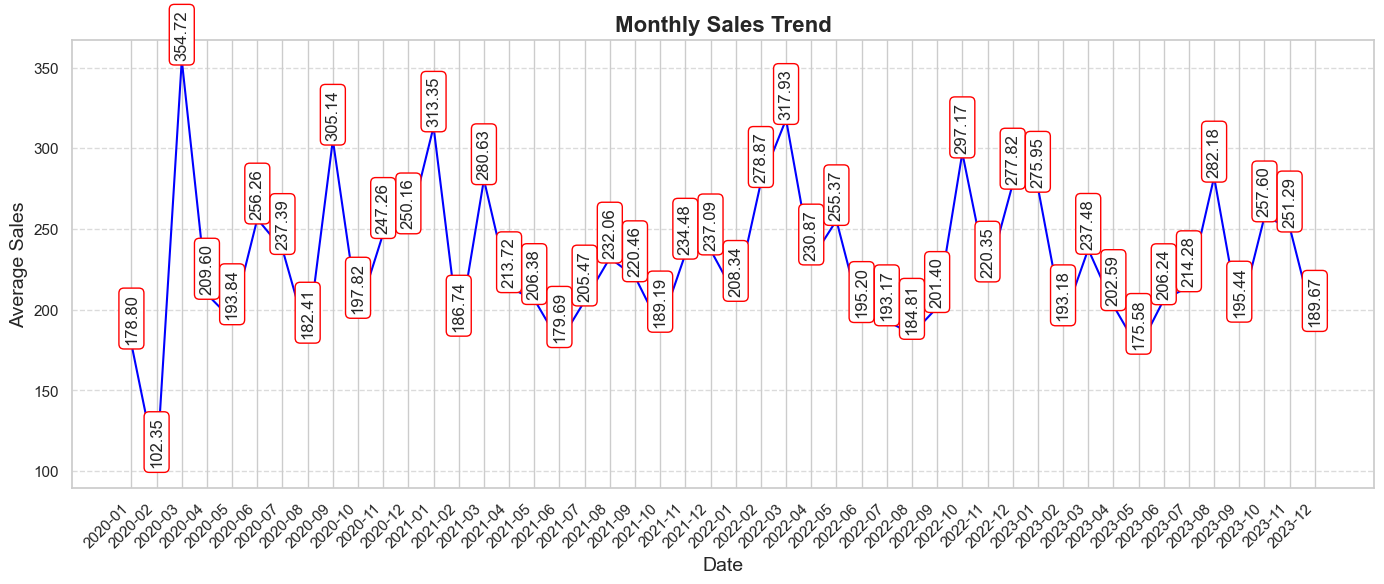

In [211]:
# Mengonversi kolom Order Date ke format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Menambah kolom Month-Year
df['Month-Year'] = df['Order Date'].dt.to_period('M')

# Total Penjualan berdasarkan Bulan dan Tahun
sales_by_month_year = df.groupby('Month-Year')['Sales'].mean()

# Visualisasi Tren Penjualan Bulanan
plt.figure(figsize=(14, 6))
ax = sns.lineplot(x=sales_by_month_year.index.astype(str), y=sales_by_month_year.values, marker='o', color='blue')

# Annotate pada setiap titik
for x, y in zip(sales_by_month_year.index.astype(str), sales_by_month_year.values):
    plt.text(x, y, f'{y:,.2f}', ha='center', va='bottom',rotation=90,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white'))

plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> **Insight :**
- Fluktuasi Penjualan yang Signifikan: Grafik menunjukkan bahwa penjualan bulanan mengalami fluktuasi yang signifikan dari waktu ke waktu. Terdapat puncak penjualan tertinggi pada beberapa bulan, seperti Maret 2020 dengan penjualan rata-rata mencapai 354.72, sementara ada penurunan yang tajam pada bulan-bulan lain, seperti Februari 2020 dengan penjualan rata-rata hanya 102.35.

- Musiman Penjualan: Tampak adanya pola musiman pada penjualan, dengan beberapa bulan menunjukkan penjualan yang konsisten lebih tinggi dibandingkan yang lain. Contohnya, bulan Maret dan Oktober menunjukkan peningkatan penjualan yang lebih tinggi, yang mungkin terkait dengan kampanye promosi atau siklus belanja pelanggan.

- Penurunan dan Pemulihan Penjualan: Ada periode penurunan penjualan yang diikuti oleh pemulihan, seperti yang terlihat antara bulan Mei hingga Juli 2021. Tren ini bisa mengindikasikan respons terhadap faktor eksternal seperti perubahan ekonomi, regulasi, atau kebijakan internal seperti perubahan harga atau diskon.

> **Rekomendasi :**
- Optimalkan Kampanye Promosi di Bulan Potensial: Mengingat adanya bulan-bulan dengan penjualan tinggi yang konsisten, perusahaan dapat fokus mengoptimalkan kampanye promosi dan penawaran khusus selama periode ini untuk memaksimalkan pendapatan.

- Analisis Penurunan Penjualan: Periode dengan penurunan tajam, seperti Februari 2020 dan Juli 2021, perlu dianalisis lebih lanjut untuk memahami penyebabnya. Ini bisa melibatkan faktor internal seperti strategi harga atau stok, atau eksternal seperti kondisi pasar atau kompetitor.

- Rencanakan Persediaan dengan Cermat: Pola musiman penjualan memungkinkan perusahaan untuk merencanakan persediaan dengan lebih baik, menghindari overstocking atau stock-out selama periode puncak dan rendah penjualan.

> **Masukkan :**
- Dengan memahami tren penjualan ini, perusahaan dapat merespons perubahan pasar dengan lebih efektif, mengalokasikan sumber daya pemasaran dengan tepat, dan meningkatkan profitabilitas keseluruhan dengan merencanakan aktivitas bisnis berdasarkan data yang lebih terarah dan strategis.

#### **4.2 Analisis Segmentasi Pelanggan Berdasarkan Perilaku Pembelian**

> Tujuan: Analisis ini bertujuan untuk mengelompokkan pelanggan berdasarkan perilaku pembelian mereka, termasuk frekuensi pembelian. Analisisnya saya rangkum dalam bentuk analisis RFM.
Analisis RFM (Recency, Frequency, Monetary) adalah teknik pemasaran yang digunakan untuk **mengelompokkan pelanggan berdasarkan perilaku pembelian mereka**. Ini mengukur tiga aspek penting,yaitu :
- `Recency (R)`: Berapa lama sejak pelanggan terakhir kali melakukan pembelian.
- `Frequency (F)`: Seberapa sering pelanggan melakukan pembelian dalam periode tertentu.
- `Monetary (M)`: Total pengeluaran pelanggan.

##### **4.2.1 Analisis RFM (Recency, Frequency, Monetary)**
> Tujuan dari Analisis RFM:

- `Segmentasi Pelanggan`: Dengan menganalisis RFM, kita dapat mengidentifikasi segmen pelanggan yang berbeda berdasarkan pola pembelian mereka. Ini membantu dalam mengembangkan strategi pemasaran yang lebih tertarget, seperti kampanye loyalitas, promosi khusus, atau reaktivasi pelanggan yang tidak aktif.
- `Optimisasi Pemasaran`: Membantu dalam mengalokasikan sumber daya pemasaran secara lebih efektif dengan fokus pada segmen pelanggan yang paling berharga.
- `Pemahaman Pelanggan`: Memberikan wawasan yang lebih dalam tentang perilaku pelanggan dan potensi nilai yang bisa mereka berikan ke perusahaan.

Pelanggan dalam segmen At Risk:
Abbott Laboratories, Banco Santander, Berkshire Hathaway, Cigna, General Electric, Glencore, Goldman Sachs Group, HSBC Holdings, Marathon Petroleum, Microsoft, News Corp., Pemex, Procter & Gamble, Sysco, Target, Verizon Communications, Walgreens
...

Pelanggan dalam segmen Champions:
Allianz, Allstate, American Express, AmerisourceBergen, Anthem, BNP Paribas, Chevron, Comcast, Ford Motor, Itochu, Johnson & Johnson, Kroger, Lowes, Lukoil, Mondelez International, Morgan Stanley, Royal Dutch Shell, Tyson Foods, UnitedHealth Group
...

Pelanggan dalam segmen Lost:
Citigroup, Exxon Mobil, Gazprom, General Motors, Huawei, Petrobras, Safeway, Tesco
...

Pelanggan dalam segmen Loyal Customers:
AT&T, Aetna, Airbus, Amazon, Apple, Aviva, BMW, Bank of America Corp., Bosch, ConocoPhillips, Fannie Mae, FedEx, Home Depot, Humana, Intel, Nissan Motor, Oracle, PepsiCo, Philip Morris International, Prudential Financial, Samsung Electronics, Siemens, Sony, Toyota Motor, T

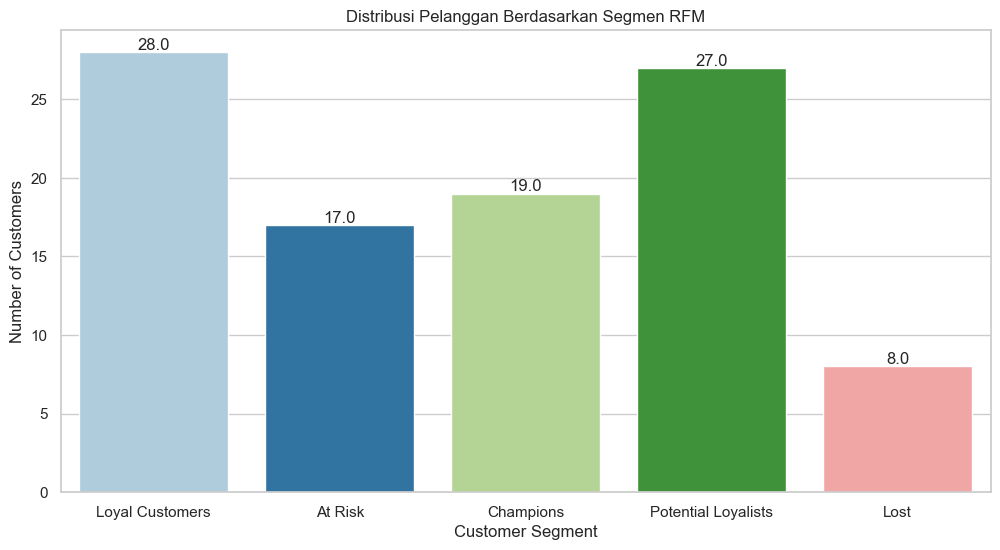

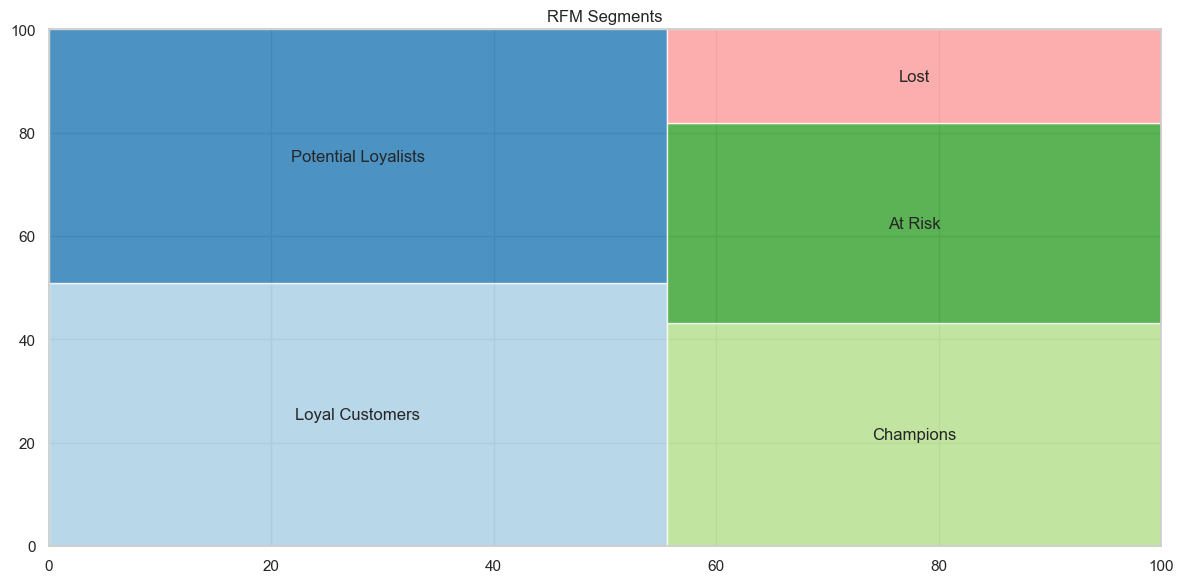

In [212]:
# Menghitung RFM (Recency, Frequency, Monetary) untuk setiap pelanggan
df['OrderDate'] = pd.to_datetime(df['Order Date'])
snapshot_date = df['OrderDate'].max() + pd.DateOffset(1)
rfm = df.groupby('Customer').agg({
    'OrderDate': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'count',
    'Sales': 'sum'
}).reset_index()

rfm.columns = ['Customer', 'Recency', 'Frequency', 'Monetary']

# Menambahkan skor untuk R, F, dan M (skor lebih tinggi untuk nilai yang lebih baik)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=range(5, 0, -1))
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=range(1, 6))
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=range(1, 6))

# Menghitung RFM Score secara keseluruhan
rfm['RFM_Sum'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Mengelompokkan pelanggan ke dalam berbagai segmen berdasarkan RFM Score
def rfm_segment(df):
    if df['RFM_Sum'] >= 13:
        return 'Champions'
    elif df['RFM_Sum'] >= 10:
        return 'Loyal Customers'
    elif df['RFM_Sum'] >= 7:
        return 'Potential Loyalists'
    elif df['RFM_Sum'] >= 4:
        return 'At Risk'
    else:
        return 'Lost'

rfm['Customer_Segment'] = rfm.apply(rfm_segment, axis=1)

# Menampilkan siapa saja pelanggan dalam setiap segmen
segmen_list = rfm.groupby('Customer_Segment')['Customer'].apply(list).reset_index()

# Menampilkan daftar pelanggan dalam setiap segmen
for segment in segmen_list['Customer_Segment']:
    print(f"Pelanggan dalam segmen {segment}:")
    pelanggan = segmen_list[segmen_list['Customer_Segment'] == segment]['Customer'].values[0]
    print(", ".join(pelanggan))  # Menampilkan 10 pelanggan pertama untuk setiap segmen
    print("...")
    print()

# Visualisasi RFM
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=rfm, x='Customer_Segment', palette='Paired')

# Menambahkan anotasi jumlah pelanggan di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # Jumlah pelanggan pada setiap bar
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi anotasi
                ha='center', va='center', 
                xytext=(0, 5),  # Jarak teks anotasi dari bar
                textcoords='offset points')
plt.title('Distribusi Pelanggan Berdasarkan Segmen RFM')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')


# Menghitung jumlah pelanggan di setiap segmen
segment_counts = rfm['Customer_Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

# Membuat Treemap
plt.figure(figsize=(12, 6))
squarify.plot(sizes=segment_counts['Count'], label=segment_counts['Segment'], alpha=.8, color=sns.color_palette("Paired"))
plt.title('RFM Segments')
plt.axis()  

plt.tight_layout()
plt.show()


> **Interpretasi :**

1. Distribusi Pelanggan Berdasarkan Segmen RFM (Countplot):
- Grafik ini menunjukkan berapa banyak pelanggan yang termasuk dalam setiap segmen, seperti **`'Champions,' 'Loyal Customers,' 'Potential Loyalists,' 'At Risk,' dan 'Lost'`**.
- Anotasi pada Bar: Anotasi menunjukkan jumlah pelanggan di setiap segmen, memberikan gambaran visual yang jelas tentang distribusi.

2. Treemap RFM Segments:
- Treemap ini memberikan representasi proporsional dari jumlah pelanggan di setiap segmen. Ukuran setiap kotak dalam treemap sebanding dengan jumlah pelanggan dalam segmen tersebut, dan warna yang berbeda memudahkan identifikasi segmen.

> **Insight :**

1. Segmen `'Champions'` kemungkinan berisi pelanggan yang **sering membeli, menghabiskan banyak uang, dan baru-baru ini melakukan pembelian**. Mereka adalah **pelanggan yang sangat berharga dan harus diberi perhatian khusus.**
2. Segmen `'Loyal Customers'` juga penting, mereka **sering membeli dengan nilai pembelian yang lebih rendah atau dalam periode yang lebih lama.**
3. Segmen `'Potential Loyalists'` menunjukkan pelanggan yang mulai menunjukkan pola **pembelian yang lebih aktif dan bisa dibuat untuk menjadi pelanggan setia**.
4. Segmen '`At Risk'` dan `'Lost'` berisi pelanggan yang **frekuensi dan nilai pembeliannya menurun atau yang sudah lama tidak membeli**. Mereka mungkin **membutuhkan kampanye reaktivasi untuk menghidupkan kembali minat mereka.**


> **Masukkan:**

1. Strategi Pemasaran yang Disesuaikan: Berdasarkan hasil segmentasi, perusahaan dapat menargetkan `'Champions'` dan `'Loyal Customers'` **dengan penawaran eksklusif atau program loyalitas untuk mempertahankan mereka. Pelanggan `'Potential Loyalists'` bisa didorong dengan promosi khusus untuk meningkatkan frekuensi dan nilai pembelian mereka.**
2. Reaktivasi Pelanggan `'At Risk'` dan `'Lost'`: Pertimbangkan untuk **mengirim kampanye reaktivasi, seperti diskon besar atau penawaran eksklusif, untuk mengembalikan minat pelanggan yang sudah tidak aktif.**
3. Pengembangan Produk: Analisis ini juga dapat memberi wawasan untuk pengembangan produk atau peningkatan layanan yang dapat menarik lebih banyak pelanggan ke segmen yang lebih tinggi.

##### **4.1.2 Analisis Customer Lifetime Value (CLV)**

> **Customer Lifetime Value (CLV)** adalah nilai total yang diprediksi dari seorang pelanggan selama masa hubungannya dengan perusahaan. CLV adalah metrik penting dalam pemasaran karena membantu perusahaan memahami berapa banyak keuntungan yang dapat dihasilkan dari seorang pelanggan selama mereka tetap menjadi pelanggan. CLV dihitung berdasarkan frekuensi pembelian dan nilai rata-rata pembelian.
Lifetime Value (CLV) dihitung dalam satuan mata uang, yang dalam dataset ini adalah dolar (USD). CLV mencerminkan total nilai moneter yang diharapkan dari seorang pelanggan selama seluruh hubungan mereka dengan perusahaan.

> **Tujuan dari Analisis CLV:**

- `Identifikasi Pelanggan Paling Bernilai:` Analisis ini membantu mengidentifikasi pelanggan yang paling bernilai bagi perusahaan, yaitu mereka yang memberikan nilai terbesar selama masa hubungan mereka dengan perusahaan.
- `Pengalokasian Sumber Daya:` Dengan mengetahui pelanggan mana yang memiliki CLV tertinggi, perusahaan dapat mengalokasikan lebih banyak sumber daya pemasaran untuk mempertahankan pelanggan ini dan memberikan layanan yang lebih personal.
- `Pengembangan Strategi Retensi:` Analisis CLV memungkinkan perusahaan untuk mengembangkan strategi retensi yang lebih efektif dengan fokus pada pelanggan bernilai tinggi.

Top 10 Customers by CLV
                 Customer  Lifetime_Value
10                 Anthem      55719.2100
38             Ford Motor      43893.0424
4                 Allianz      42904.1670
16  Bank of America Corp.      41255.9471
92          Valero Energy      41220.4188
55                  Lowes      40360.1630
89            Tyson Foods      40326.3440
5                Allstate      39941.6400
9       AmerisourceBergen      39234.7610
13                    BMW      39083.7900

Bottom 10 Customers by CLV
               Customer  Lifetime_Value
39              Gazprom       5402.9020
27            Citigroup       6132.5210
78              Safeway       6633.1370
17   Berkshire Hathaway       7100.9290
86                Tesco       8173.2260
40     General Electric       8637.7130
71            Petrobras       9628.4310
35          Exxon Mobil      10582.8080
43  Goldman Sachs Group      10831.8255
15      Banco Santander      11065.0582


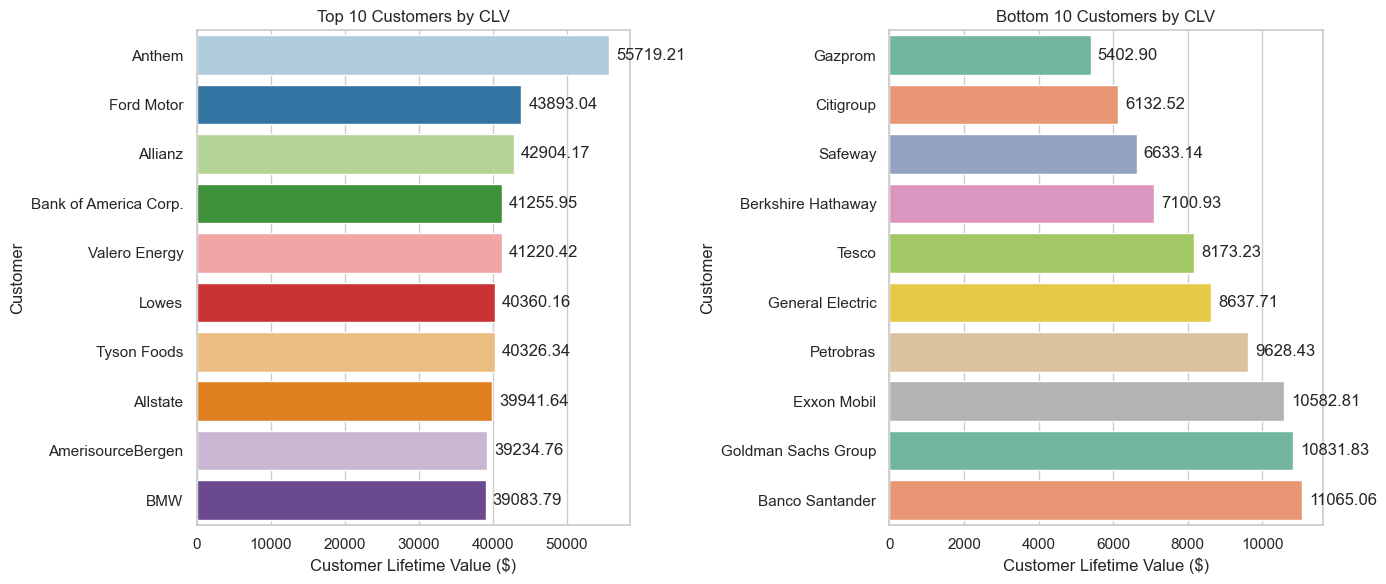

In [213]:
# Menghitung Customer Lifetime Value (CLV)
clv = rfm.copy()
clv['Average_Value'] = clv['Monetary'] / clv['Frequency']
clv['Lifetime_Value'] = clv['Average_Value'] * clv['Frequency']

# Menemukan 10 pelanggan dengan CLV tertinggi
top_10_customers = clv.sort_values(by='Lifetime_Value', ascending=False).head(10)

# Menemukan 10 pelanggan dengan CLV terendah
bottom_10_customers = clv.sort_values(by='Lifetime_Value', ascending=True).head(10)

print("Top 10 Customers by CLV")
print(top_10_customers[['Customer', 'Lifetime_Value']])

print("\nBottom 10 Customers by CLV")
print(bottom_10_customers[['Customer', 'Lifetime_Value']])

# Visualisasi CLV tertinggi dan terendah
plt.figure(figsize=(14, 6))

# Plot Top 10 Customers by CLV
plt.subplot(1, 2, 1)
ax = sns.barplot(x='Lifetime_Value', y='Customer', data=top_10_customers, palette='Paired')

# Menambahkan anotasi jumlah pelanggan di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',  # Menampilkan nilai CLV dengan 2 desimal
                (p.get_width(), p.get_y() + p.get_height() / 2),  # Posisi anotasi
                ha='left', va='center', 
                xytext=(5, 0),  # Jarak teks anotasi dari bar
                textcoords='offset points')

plt.title('Top 10 Customers by CLV')
plt.xlabel('Customer Lifetime Value ($)')
plt.ylabel('Customer')

# Plot Bottom 10 Customers by CLV
plt.subplot(1, 2, 2)
ax = sns.barplot(x='Lifetime_Value', y='Customer', data=bottom_10_customers, palette='Set2')

# Menambahkan anotasi jumlah pelanggan di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',  # Menampilkan nilai CLV dengan 2 desimal
                (p.get_width(), p.get_y() + p.get_height() / 2),  # Posisi anotasi
                ha='left', va='center', 
                xytext=(5, 0),  # Jarak teks anotasi dari bar
                textcoords='offset points')

plt.title('Bottom 10 Customers by CLV')
plt.xlabel('Customer Lifetime Value ($)')
plt.ylabel('Customer')

plt.tight_layout()
plt.show()


> **Interpretasi :**

1. `Top 10 Customers by CLV:`
- Grafik Batang (Barplot) di sebelah kiri menunjukkan 10 pelanggan teratas berdasarkan CLV. **Pelanggan ini memiliki Lifetime_Value yang tinggi, yang berarti mereka sering membeli dan menghabiskan lebih banyak uang selama waktu mereka sebagai pelanggan.**
- Anotasi: Nilai CLV ditampilkan di sebelah kanan setiap batang, memberikan informasi langsung tentang berapa banyak Lifetime_Value yang mereka bawa ke perusahaan.
2. `Bottom 10 Customers by CLV:`
- Grafik Batang (Barplot) di sebelah kanan menunjukkan 10 pelanggan terbawah berdasarkan CLV. **Pelanggan ini mungkin hanya melakukan pembelian satu kali atau membeli dengan frekuensi yang rendah dan dengan nilai yang rendah.**
- Anotasi: Nilai CLV ditampilkan untuk memberikan konteks tentang kontribusi finansial pelanggan ini kepada perusahaan.

>**Insight :**

1. `Pelanggan Bernilai Tinggi:` Pelanggan yang ada di daftar 10 teratas kemungkinan besar adalah **pelanggan setia yang sering berinteraksi dengan produk atau layanan perusahaan**. Mereka memberikan kontribusi signifikan terhadap pendapatan perusahaan dan **harus diberi perhatian lebih, seperti program loyalitas atau penawaran eksklusif.**
2. `Pelanggan Bernilai Rendah:` Pelanggan yang ada di daftar 10 terbawah **melakukan satu pembelian atau memiliki interaksi yang sangat terbatas dengan perusahaan.** Mereka bisa menjadi target untuk kampanye pemasaran yang bertujuan meningkatkan keterlibatan atau frekuensi pembelian.
3. `Peluang Peningkatan:` Pelanggan dengan CLV rendah mungkin membutuhkan insentif untuk meningkatkan frekuensi pembelian mereka, seperti diskon khusus atau pengingat produk.

> **Masukkan:**

1. `Fokus pada Pelanggan Bernilai Tinggi:` Perusahaan harus mempertahankan hubungan baik dengan pelanggan di segmen CLV tertinggi, mungkin dengan menawarkan program loyalitas yang menarik, akses awal ke produk baru, atau layanan pelanggan prioritas.
2. `Reaktivasi Pelanggan Bernilai Rendah:` Pelanggan di segmen CLV rendah mungkin bisa ditingkatkan melalui kampanye reaktivasi yang dirancang untuk meningkatkan keterlibatan mereka dengan merek.
3. `Strategi Peningkatan CLV:` Memahami faktor-faktor yang menyebabkan CLV tinggi dapat membantu dalam mengembangkan strategi untuk meningkatkan nilai pelanggan lainnya. Ini bisa termasuk program upsell atau cross-sell yang dirancang untuk meningkatkan nilai rata-rata transaksi atau frekuensi pembelian.

#### **4.3 Analisis pasar perusahaan**

> **Tujuan :** Identifikasi wilayah atau subwilayah dengan kinerja terbaik, dan memahami distribusi pelanggan di berbagai industri.

In [214]:
# Subregion
df.groupby('Subregion')['Country'].unique().reset_index()

,Subregion,Country
0,ANZ,"[Australia, New Zealand]"
1,APAC,"[Philippines, Singapore, South Korea, China, Indonesia, Taiwan]"
2,EU,[Italy]
3,EU-EAST,"[Russia, Czech Republic, Israel, Ukraine, Greece]"
4,EU-WEST,"[Germany, France, Luxembourg, Spain, Portugal, Belgium, Netherlands, Poland, Austria, Denmark, Croatia, Slovenia, Iceland]"
5,IND,[India]
6,JAPN,[Japan]
7,LATAM,"[Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
8,MEA,"[Turkey, South Africa, Saudi Arabia, United Arab Emirates, Egypt, Qatar]"
9,NAMER,"[United States, Canada]"


##### **4.3.1 Average Profit Margin (%) untuk setiap Subregion dan Negara**

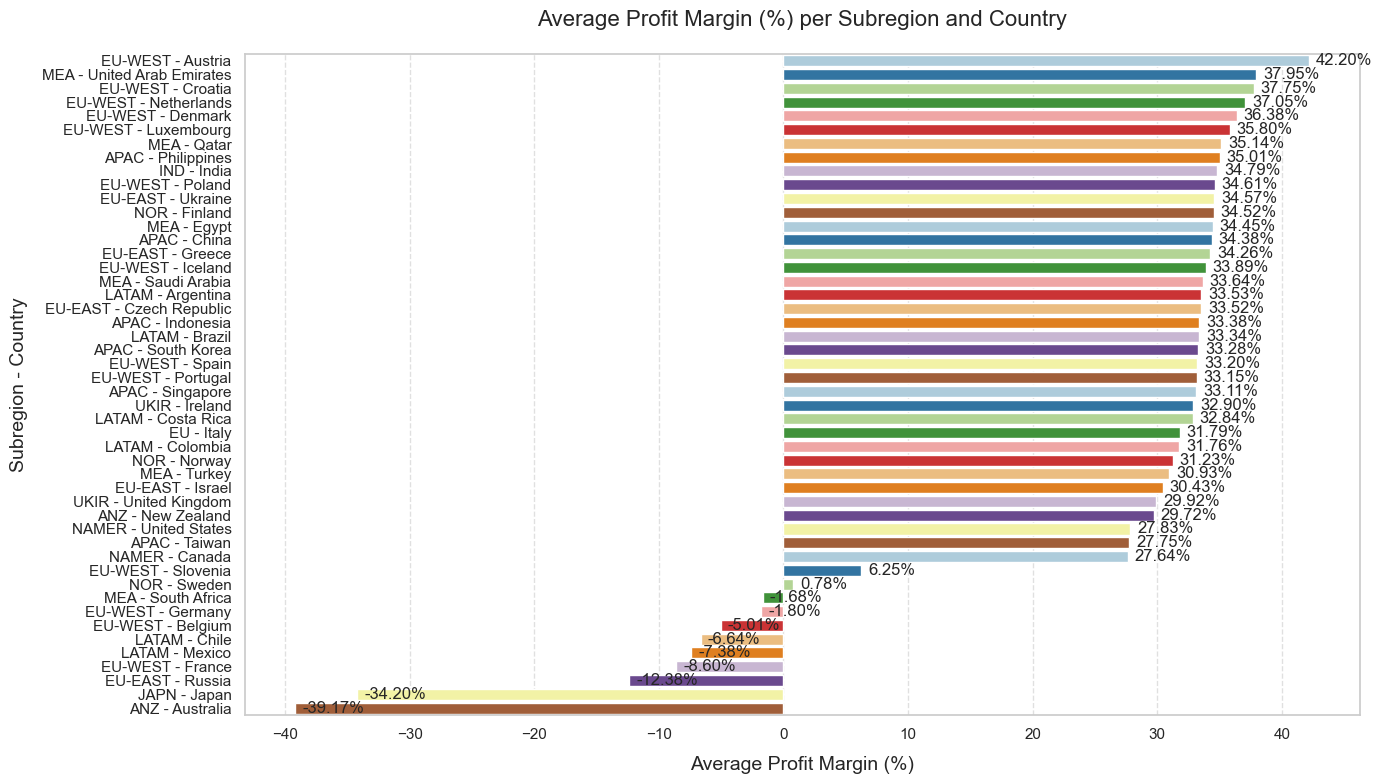

In [215]:
# Average Profit Margin (%) untuk setiap Subregion dan Negara
profit_by_subregion = df.groupby(['Subregion','Country'])['Profit Margin (%)'].mean()
profit_by_subregion.index.set_names(['Subregion', 'Country'], inplace=True)
profit_by_subregion = profit_by_subregion.sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=profit_by_subregion.values, y=profit_by_subregion.index.get_level_values(0) + ' - ' + profit_by_subregion.index.get_level_values(1), palette='Paired')

# Annotate 
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%',  # Format anotasi sebagai persentase
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center',  
                xytext=(5, 0),  
                textcoords='offset points')

plt.title('Average Profit Margin (%) per Subregion and Country', fontsize=16, pad=20)
plt.xlabel('Average Profit Margin (%)', fontsize=14, labelpad=10)
plt.ylabel('Subregion - Country', fontsize=14, labelpad=10)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

>**Interpretasi :**
1. Negara dengan Profit Margin Tertinggi:
    - Austria (EU-WEST) memimpin dengan margin keuntungan tertinggi 42.20%, diikuti oleh UAE (MEA) 37.95%. Negara-negara di Eropa Barat dan Timur Tengah umumnya menunjukkan profitabilitas tinggi.

2. Negara dengan Profit Margin Negatif:
    - Australia (ANZ) dan Japan (JAPN) memiliki margin negatif terendah, masing-masing -39.17% dan -34.20%. Ini mengindikasikan kerugian yang signifikan di pasar-pasar ini, kemungkinan karena biaya tinggi atau strategi yang kurang efektif.

>**Insight :**
- Fokus pada Pasar Menguntungkan: Negara-negara dengan margin tinggi seperti Austria dan UAE menunjukkan potensi untuk ekspansi dan peningkatan keuntungan.
- Perbaikan di Pasar Rugi: Australia dan Japan membutuhkan penyesuaian strategi untuk memperbaiki kerugian yang terjadi, seperti penyesuaian harga atau pengurangan biaya.

>**Masukkan :**
- Ekspansi di Pasar Positif: Manfaatkan kekuatan di pasar dengan margin tinggi untuk mengembangkan bisnis.
- Optimalisasi Pasar Bermasalah: Evaluasi ulang strategi di pasar dengan margin negatif untuk meningkatkan profitabilitas.

##### **4.3.2 Profit Margin (%) per produk per subregion**

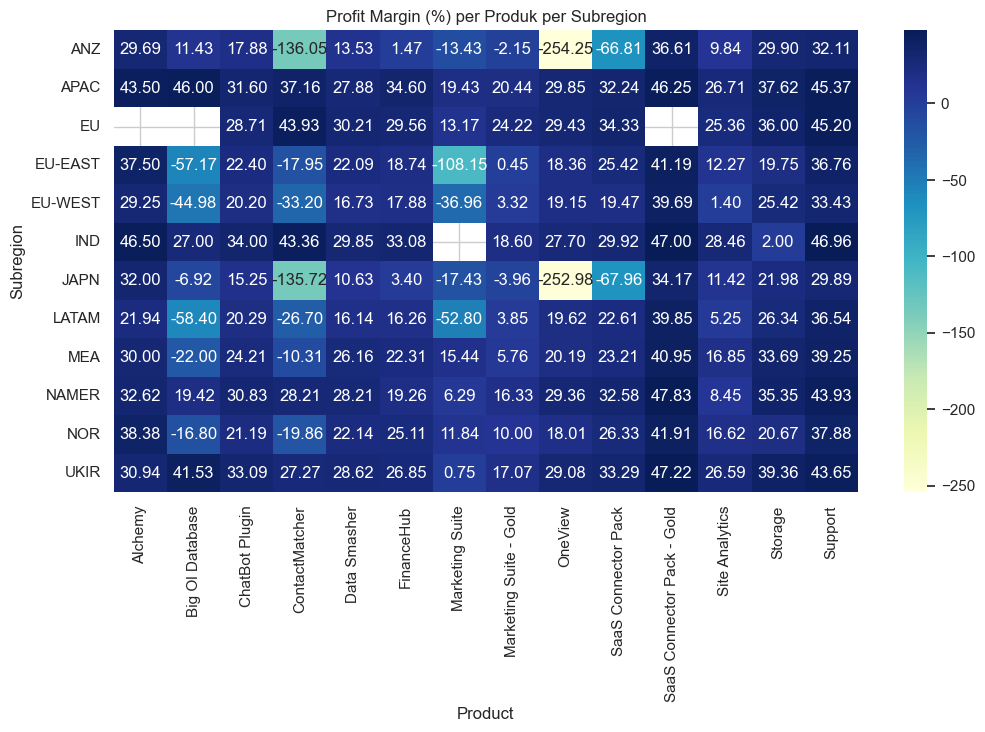

In [216]:
# Profit Margin (%) per produk per subregion
profit_by_product_subregion = df.groupby(['Subregion', 'Product'])['Profit Margin (%)'].mean().reset_index()

plt.figure(figsize=(12, 6))
# Menggunakan pivot dengan parameter yang benar
pivot_table = profit_by_product_subregion.pivot(index='Subregion', columns='Product', values='Profit Margin (%)')
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Profit Margin (%) per Produk per Subregion')
plt.xlabel('Product')
plt.ylabel('Subregion')
plt.show()

> **Interpretasi :**
    - Heatmap ini menunjukkan Profit Margin (%) per produk di setiap subregion, dengan warna lebih gelap mengindikasikan margin yang lebih rendah atau negatif.

1. `Subregion dengan Margin Negatif:`
    - ANZ: Produk seperti Alchemy dan ContactMatcher menunjukkan margin negatif besar, terutama Alchemy (-136.05%).
    - JAPN: Produk ContactMatcher dan OneView menunjukkan margin negatif ekstrem, masing-masing -135.72% dan -252.98%.
    - LATAM: ContactMatcher juga mengalami margin negatif signifikan (-58.40%).

2. `Subregion dengan Margin Positif Tertinggi:`

    - APAC: Big Ol Database dan SaaS Connector Pack - Gold memiliki margin keuntungan tinggi.
    - EU: Produk seperti OneView dan Marketing Suite - Gold menunjukkan margin positif yang konsisten.

3. `Produk dengan Variabilitas Tinggi:`

    - ContactMatcher: Margin sangat bervariasi, dari negatif di beberapa subregion (ANZ, JAPN, LATAM) hingga positif di EU.
    - Alchemy: Menunjukkan margin yang sangat beragam, tergantung pada pasar lokal.

> **Masukkan :**
- Evaluasi Produk dengan Margin Negatif: Produk seperti Alchemy dan ContactMatcher perlu dianalisis lebih lanjut untuk menemukan akar penyebab kerugian.
- Optimalkan Produk Berkinerja Baik: Produk dengan margin tinggi, seperti Big Ol Database di APAC, dapat diperluas ke pasar lain untuk memaksimalkan keuntungan.
- Penyesuaian Strategi: Subregion dengan margin negatif ekstrem, seperti JAPN dan ANZ, mungkin memerlukan penyesuaian harga atau pengurangan biaya operasional untuk meningkatkan profitabilitas.

##### **4.3.3 Potensi Pertumbuhan Subregion Berdasarkan Profit Margin (%)**

> **Tujuan :** Analisis ini untuk melihat **potensi pertumbuhan subregion berdasarkan Profit Margin (%)**. 
- Tujuan dari Analisis: Mengidentifikasi Subregion yang Paling Menguntungkan, dengan melihat profit margin perusahaan dapat fokus pada subregion yang menunjukkan kemampuan terbaik dalam menghasilkan keuntungan.
- Optimalisasi Strategi: Memungkinkan perusahaan untuk menyesuaikan strategi di berbagai subregion dengan mempertimbangkan profitabilitas, seperti dengan meningkatkan investasi di subregion yang sudah memiliki margin keuntungan yang tinggi.

<Figure size 1600x1000 with 0 Axes>

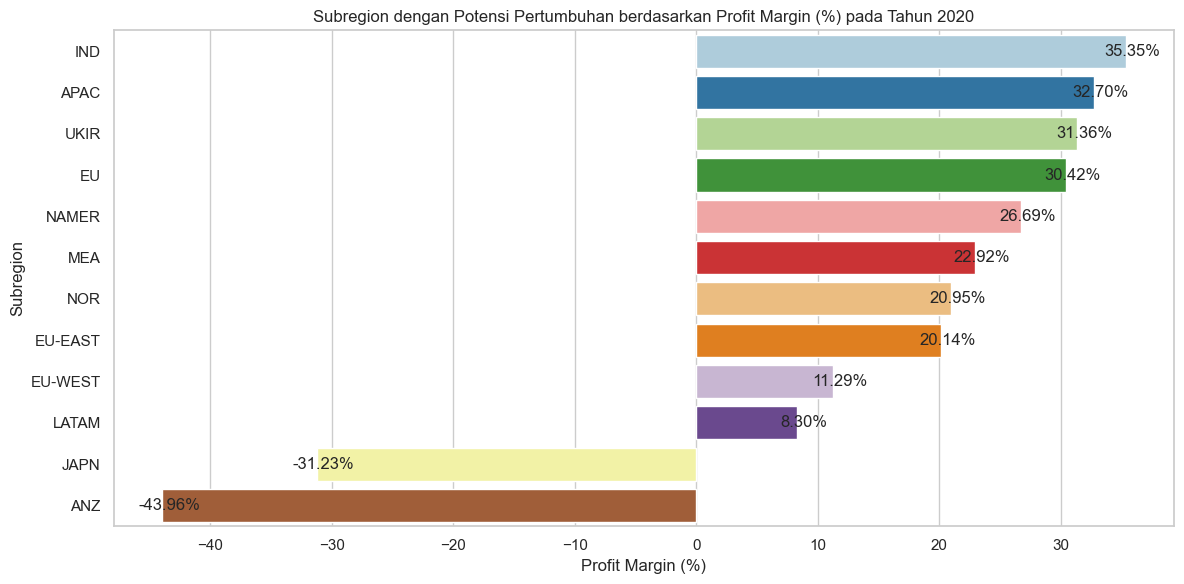

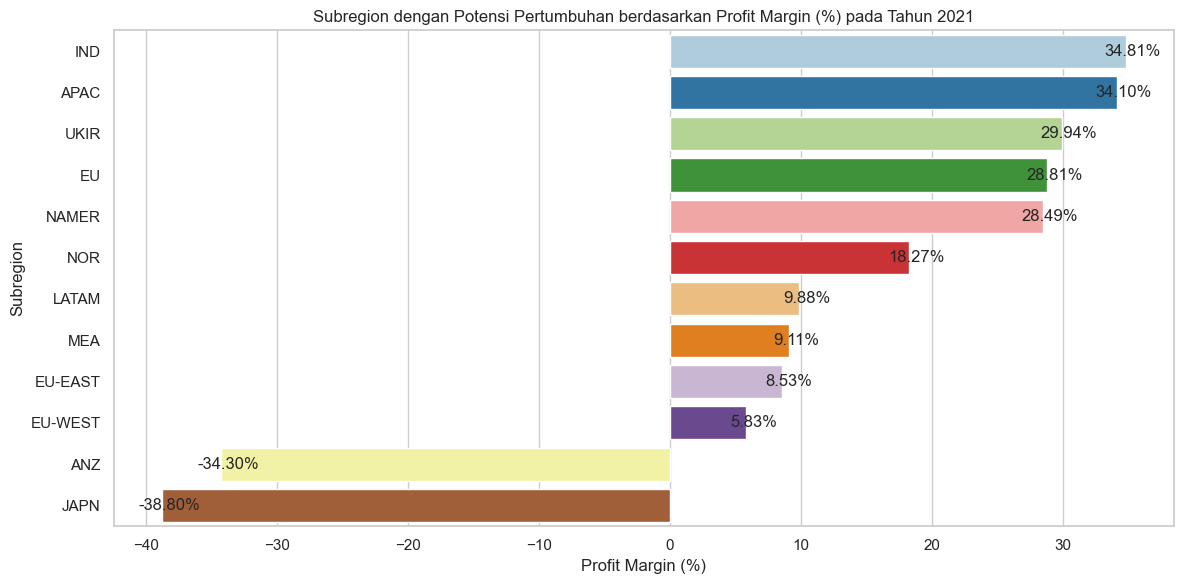

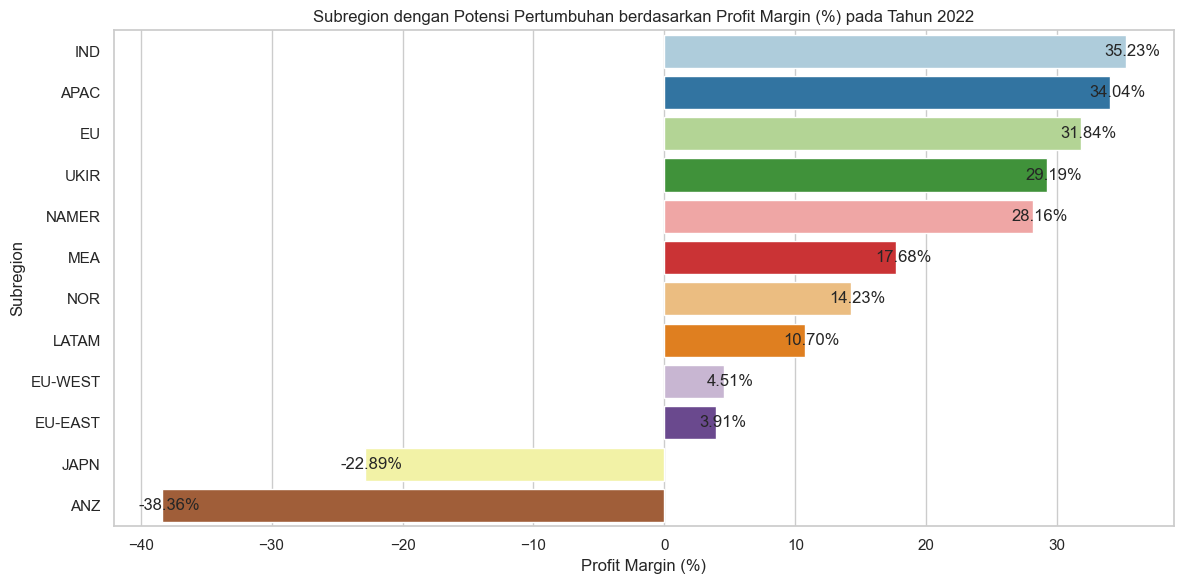

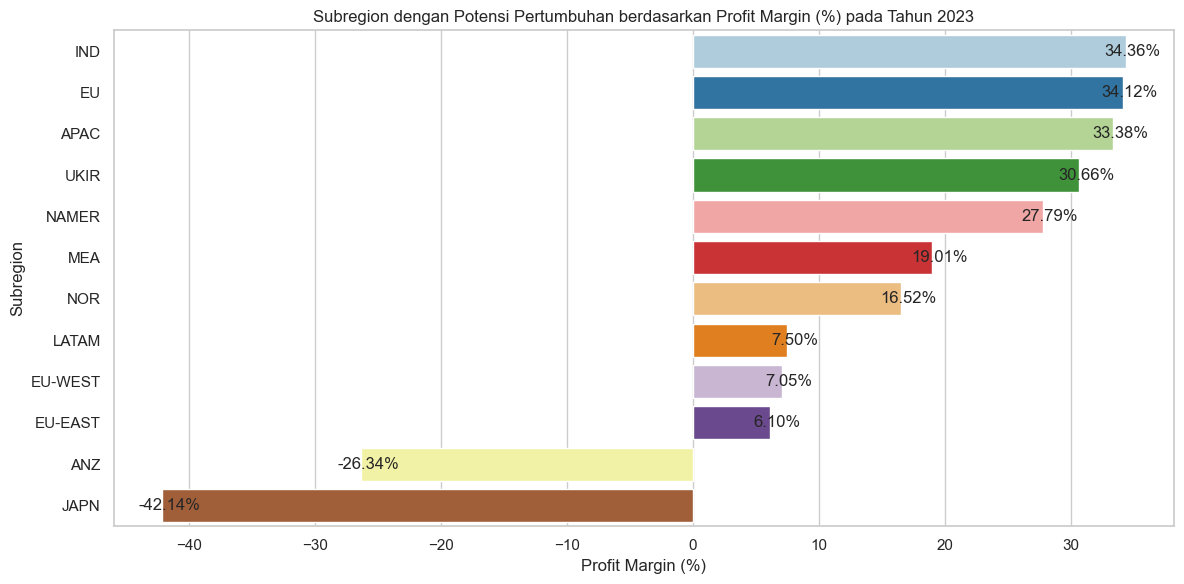

In [217]:
# Menghitung profit margin rata-rata per subregion per tahun
subregion_profit_margin_yearly = df.groupby(['Year', 'Subregion']).agg({
    'Profit Margin (%)': 'mean'
}).reset_index()

# Mengurutkan berdasarkan profit margin
subregion_profit_margin_yearly = subregion_profit_margin_yearly.sort_values(by=['Year', 'Profit Margin (%)'], ascending=[True, False])

# Visualisasi per tahun
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

for year in subregion_profit_margin_yearly['Year'].unique():
    plt.figure(figsize=(12, 6))
    data = subregion_profit_margin_yearly[subregion_profit_margin_yearly['Year'] == year]
    
    ax = sns.barplot(x='Profit Margin (%)', y='Subregion', data=data, palette='Paired')
    
    # Annotate
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}%',
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center',
                    xytext=(5, 0),
                    textcoords='offset points')
    
    plt.title(f'Subregion dengan Potensi Pertumbuhan berdasarkan Profit Margin (%) pada Tahun {year}')
    plt.xlabel('Profit Margin (%)')
    plt.ylabel('Subregion')

    plt.tight_layout()
    plt.show()


> **Interpretasi :**
- `Bar Plot Profit Margin per Tahun:` Setiap grafik batang menunjukkan profit margin rata-rata untuk subregion tertentu dalam tahun tertentu. Subregion dengan margin keuntungan tertinggi ditempatkan di bagian atas grafik.
- `Anotasi:` Setiap batang diberi anotasi dengan nilai profit margin dalam persentase (%), yang memudahkan interpretasi visual tentang kontribusi profitabilitas masing-masing subregion.

> **Insight :**
- `Subregion yang Konsisten Tinggi:` `IND` dan `APAC` menunjukkan profit margin yang tinggi dan konsisten dari tahun ke tahun, menandakan bahwa subregion ini sangat efisien dalam menghasilkan keuntungan.
- `Subregion dengan Profit Margin Negatif:` Subregion seperti `ANZ` dan `JAPN` menunjukkan profit margin negatif di beberapa tahun, yang bisa menunjukkan masalah dalam harga, biaya, atau penjualan di wilayah tersebut. Ini bisa menjadi area fokus untuk perbaikan.
- `Fluktuasi Tahunan:` Beberapa subregion menunjukkan fluktuasi yang signifikan dalam profit margin dari tahun ke tahun, yang mungkin disebabkan oleh faktor eksternal atau internal yang perlu dianalisis lebih lanjut.

> **Masukkan:**
- `Fokus pada Efisiensi:` Subregion dengan profit margin tinggi, seperti `IND` dan `APAC`, harus dipertahankan dan difokuskan dalam hal strategi penjualan dan pemasaran. Dengan profit yang bagus dari region ini dapat  mengidentifikasi apa yang membuat subregion ini begitu efisien dan dapat dicoba atau di praktikan di wilayah lain.
- `Intervensi :` Subregion dengan margin keuntungan negatif atau rendah membutuhkan pemantauan lebih lanjut untuk mengidentifikasi akar masalahnya. Intervensi mungkin diperlukan untuk mengoptimalkan operasional, harga, atau strategi pemasaran di wilayah tersebut.
- `Monitoring yang Berkelanjutan:` Lanjutkan memantau profit margin setiap tahun untuk setiap subregion guna memastikan bahwa perusahaan tetap fokus pada wilayah yang paling menguntungkan dan dapat merespons perubahan dengan cepat.

##### **4.3.4 Profit Margin Negatif di Subregion**

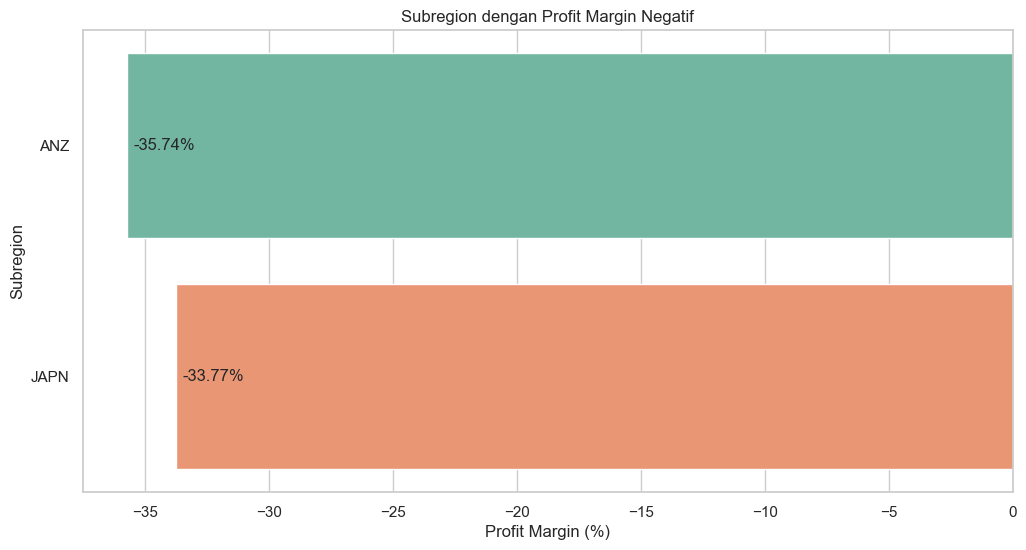

In [218]:
# Menambahkan kolom tahun ke dataframe
df['OrderDate'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['OrderDate'].dt.year

# Menghitung profit margin rata-rata per subregion per tahun
subregion_profit_margin_yearly = df.groupby(['Year', 'Subregion']).agg({
    'Profit Margin (%)': 'mean'
}).reset_index()

# Filter data untuk subregion yang memiliki profit margin negatif
negative_profit_margin = subregion_profit_margin_yearly[subregion_profit_margin_yearly['Profit Margin (%)'] < 0]

# Gabungkan dengan data utama untuk mendapatkan informasi tambahan
negative_profit_margin_details = pd.merge(df, negative_profit_margin, on=['Year', 'Subregion'])

# Mencari subregion yang termasuk dalam daftar profit margin negatif
subregion_list = negative_profit_margin_details['Subregion'].unique()

# Melihat data negara dalam subregion tersebut
countries_in_negative_subregions = negative_profit_margin_details.groupby(['Subregion', 'Country']).size().reset_index(name='Count')

# Melihat produk yang dijual dalam subregion tersebut
products_in_negative_subregions = negative_profit_margin_details.groupby(['Subregion', 'Product']).agg({
    'Quantity': 'sum',
    'Sales': 'sum',
    'Discount': 'sum',
    'Profit': 'sum'
}).reset_index()

# Melihat biaya yang dikeluarkan (Cost) di subregion tersebut
cost_in_negative_subregions = negative_profit_margin_details.groupby(['Subregion']).agg({
    'Sales': 'mean',
    'Profit': 'mean',
    'Discount': 'mean'
}).reset_index()

# Visualisasi Profit Margin Negatif
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Profit Margin (%)', y='Subregion', data=negative_profit_margin, palette='Set2', ci=None)
ax.set_title('Subregion dengan Profit Margin Negatif')
ax.set_xlabel('Profit Margin (%)')
ax.set_ylabel('Subregion')

# Annotate
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.show()



> **Interpretasi :**

1. `Profit Margin Negatif di Subregion:`
    - Visualisasi menunjukkan bahwa terdapat dua subregion dengan profit margin negatif, yaitu JAPN (Japan) dan ANZ (Australia & New Zealand). Profit margin negatif ini berarti bahwa biaya yang dikeluarkan melebihi pendapatan yang diperoleh dari penjualan di wilayah ini, menyebabkan kerugian bagi perusahaan.

2. `Negara dalam Subregion dengan Profit Margin Negatif:`
    - Negara-negara yang termasuk dalam subregion dengan profit margin negatif adalah:
        - ANZ: Australia dan New Zealand.
        - JAPN: Japan.
    - Australia memiliki jumlah transaksi yang lebih besar dibandingkan dengan New Zealand dalam subregion ANZ, sementara Japan adalah satu-satunya negara dalam subregion JAPN.

3. `Produk yang Dijual dalam Subregion dengan Profit Margin Negatif:`
    - Produk utama yang dijual di subregion ini meliputi berbagai layanan AWS SaaS, dengan kuantitas yang cukup signifikan. Namun, penjualan yang tinggi tidak selalu diikuti dengan profitabilitas yang baik, yang terlihat dari kerugian yang diderita.
    - Produk-produk seperti Alchemy, Big Ol Database, dan ContactMatcher memiliki penjualan yang signifikan tetapi masih berkontribusi pada profit margin negatif, menunjukkan kemungkinan masalah dalam harga, biaya, atau permintaan produk.

4. `Biaya yang Dikeluarkan di Subregion dengan Profit Margin Negatif:`
    - Biaya (termasuk penjualan, profit, dan diskon) yang dikeluarkan di subregion ini menunjukkan bahwa meskipun ada penjualan yang signifikan, profit negatif menunjukkan pengeluaran yang lebih besar daripada pendapatan, terutama karena diskon yang tinggi atau biaya operasional yang tidak seimbang.

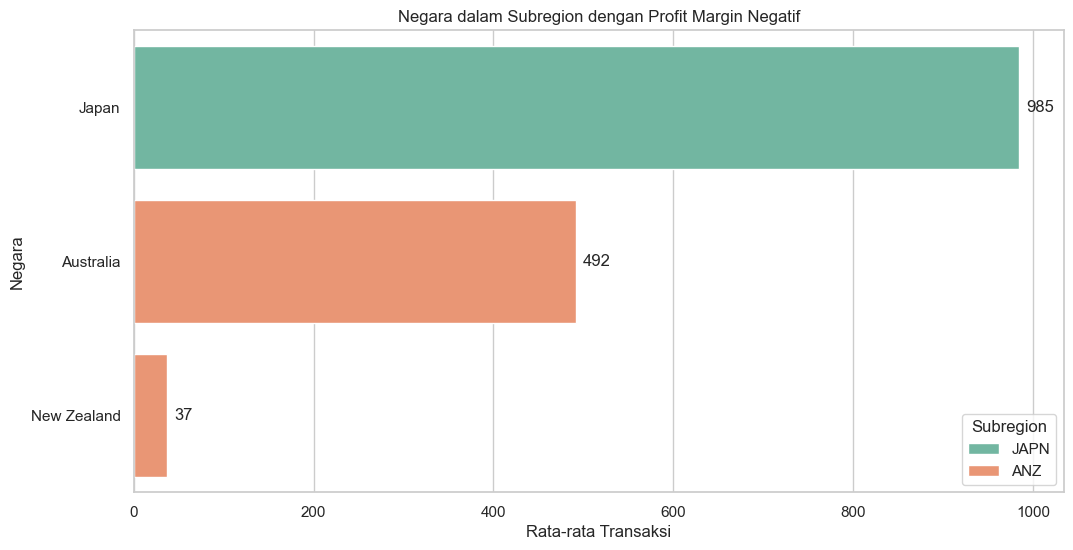

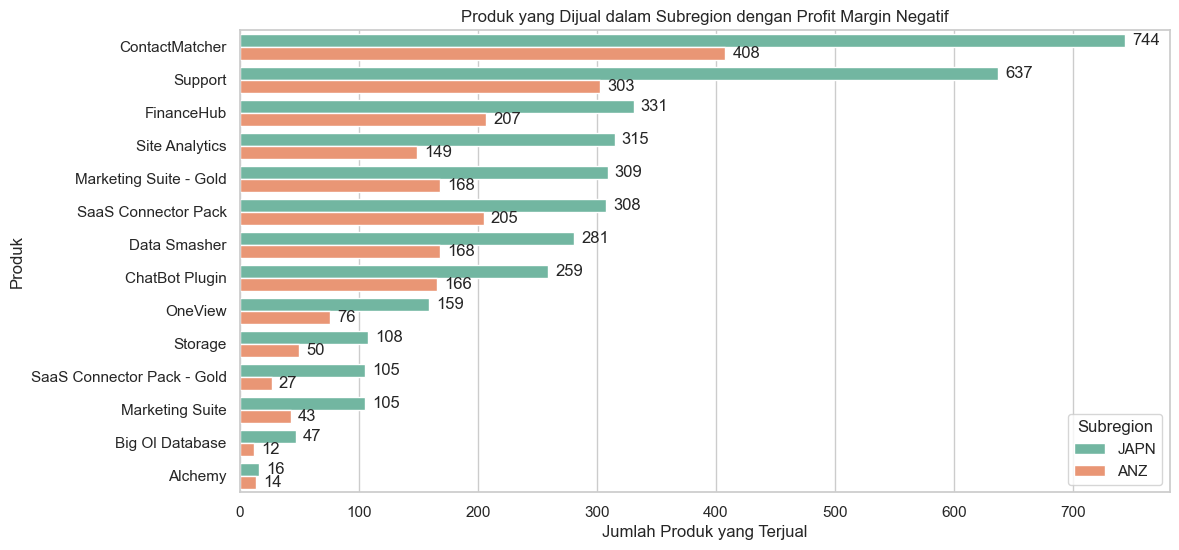

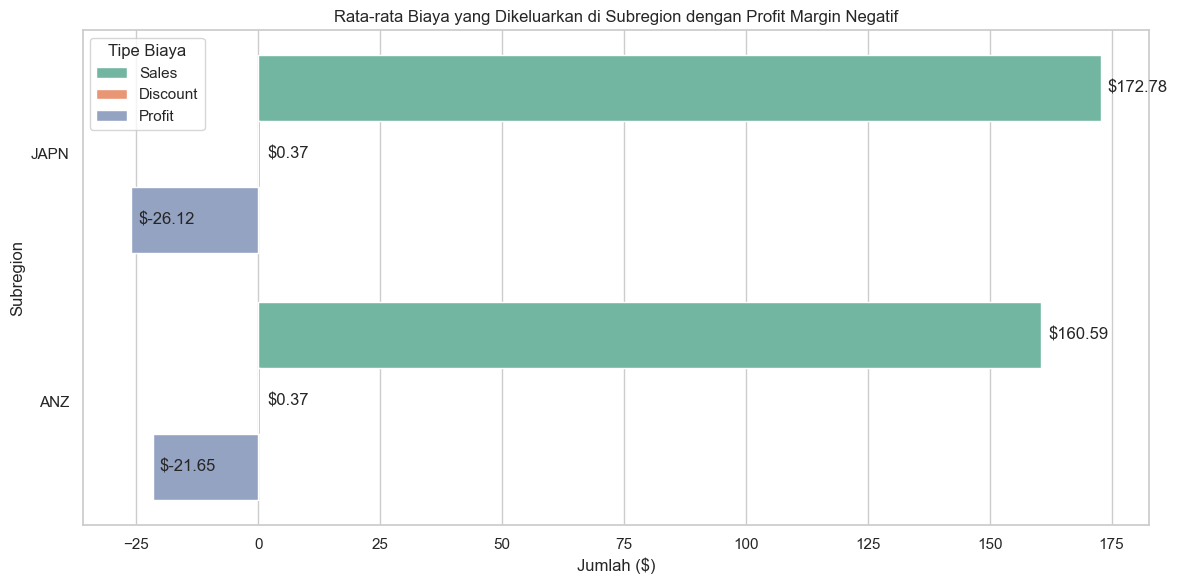

In [219]:
## Mengurutkan data dari besar ke kecil untuk visualisasi
# Negara dalam Subregion dengan Profit Margin Negatif
countries_in_negative_subregions_sorted = countries_in_negative_subregions.sort_values(by='Count', ascending=False)

# Produk yang Dijual dalam Subregion dengan Profit Margin Negatif
products_in_negative_subregions_sorted = products_in_negative_subregions.sort_values(by='Quantity', ascending=False)

# Biaya yang Dikeluarkan di Subregion dengan Profit Margin Negatif
cost_in_negative_subregions_melted_sorted = cost_in_negative_subregions.melt(id_vars='Subregion', value_vars=['Sales', 'Profit', 'Discount'], var_name='Type', value_name='Amount')
cost_in_negative_subregions_melted_sorted = cost_in_negative_subregions_melted_sorted.sort_values(by='Amount', ascending=False)


# Visualisasi Negara dalam Subregion dengan Profit Margin Negatif 
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Count', y='Country', hue='Subregion', data=countries_in_negative_subregions_sorted, palette='Set2')
plt.title('Negara dalam Subregion dengan Profit Margin Negatif')
plt.xlabel('Rata-rata Transaksi')
plt.ylabel('Negara')
plt.legend(title='Subregion')

# Annotate
for p in ax.patches:
    if p.get_width() != 0:
        ax.annotate(f'{p.get_width():.0f}',
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center',
                    xytext=(5, 0),
                    textcoords='offset points')

# Visualisasi Produk yang Dijual dalam Subregion dengan Profit Margin Negatif 
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Quantity', y='Product', hue='Subregion', data=products_in_negative_subregions_sorted, palette='Set2')
plt.title('Produk yang Dijual dalam Subregion dengan Profit Margin Negatif')
plt.xlabel('Jumlah Produk yang Terjual')
plt.ylabel('Produk')
plt.legend(title='Subregion')

# Annotate
for p in ax.patches:
    if p.get_width() != 0:
        ax.annotate(f'{p.get_width():.0f}',
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center',
                    xytext=(5, 0),
                    textcoords='offset points')

# Visualisasi Biaya yang Dikeluarkan di Subregion dengan Profit Margin Negatif 
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Amount', y='Subregion', hue='Type', data=cost_in_negative_subregions_melted_sorted, palette='Set2')
plt.title('Rata-rata Biaya yang Dikeluarkan di Subregion dengan Profit Margin Negatif')
plt.xlabel('Jumlah ($)')
plt.ylabel('Subregion')
plt.legend(title='Tipe Biaya')

# Annotate
for p in ax.patches:
    if p.get_width() != 0:
        ax.annotate(f'${p.get_width():,.2f}',
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center',
                    xytext=(5, 0),
                    textcoords='offset points')
        
plt.tight_layout()
plt.show()


> **Insight :**

1. `Subregion dengan Negara dan Produk Terkait:`
    - ANZ: Australia dan New Zealand berkontribusi pada profit margin negatif. Produk yang dijual meliputi layanan AWS SaaS seperti Alchemy dan Big Ol Database. Meskipun volume penjualan tinggi, profitabilitasnya rendah karena pengeluaran yang tinggi dan diskon besar.
    - JAPN: Japan adalah satu-satunya negara dalam subregion JAPN. Produk yang dijual di sini juga mencakup layanan AWS SaaS. Sama seperti ANZ, profitabilitasnya rendah meskipun penjualan cukup signifikan.

2. `Pengaruh Harga dan Diskon:`
    - Diskon besar-besaran dan strategi harga yang tidak tepat memungkinkan berkontribusi pada kerugian di wilayah ini. Tingginya biaya operasional dan pemberian diskon yang terlalu besar bisa menjadi penyebab utama margin negatif.

3. `Operasional dan Kebijakan Pemerintah:`
- Subregion seperti ANZ dan JAPN memungkinkan terpengaruh oleh regulasi pemerintah lokal yang bisa membatasi atau mempersulit penjualan layanan AWS SaaS. Kebijakan-kebijakan seperti perlindungan data, persyaratan kepatuhan lokal, dan kompetisi dengan penyedia layanan cloud lokal bisa menjadi faktor yang mempengaruhi profitabilitas.

> **Kesimpulan :**
- Subregion ANZ (Australia & New Zealand) dan JAPN (Japan) mengalami profit margin negatif karena beberapa faktor utama:
    - Harga dan Diskon: Diskon besar dan strategi harga yang kurang optimal telah mengurangi margin keuntungan meskipun ada penjualan yang signifikan.
    - Biaya Operasional Tinggi: Tingginya biaya operasional di wilayah ini, termasuk biaya logistik, pemasaran, dan dukungan pelanggan, memungkinkan berkontribusi pada kerugian.
    - Pengaruh Kebijakan Pemerintah: Regulasi lokal yang ketat dan persaingan dari penyedia layanan cloud domestik dapat memperparah situasi, mengurangi daya saing AWS di wilayah ini.

> **Literatur dan Referensi yang menjadikan Subregion ANZ (Australia & New Zealand) dan JAPN (Japan) mengalami profit margin negatif**

Pengaruh Kebijakan Pemerintah: Beberapa penelitian telah menunjukkan bahwa kebijakan pemerintah yang ketat terkait perlindungan data dan persaingan dapat mempengaruhi profitabilitas perusahaan internasional di pasar lokal. Misalnya, artikel dari *Journal of International Business Studies* menjelaskan bahwa kebijakan lokal yang restriktif dapat mempengaruhi harga dan strategi bisnis perusahaan multinasional, termasuk perusahaan teknologi seperti AWS [(Peng, 2008)](https://researchgate.net/publication/5223374_An_institutional-based_view_of_international_business_strategy_A_focus_on_emerging_economies_Journal_of_International_Business_Studies_395_920-936).

> **Jepang, Australia, dan Selandia Baru memiliki pendekatan yang berbeda terkait kebijakan lokal yang restriktif mengenai data antara tahun 2020-2024.**

1. Jepang
Jepang secara umum tidak menerapkan persyaratan data localization atau data residency yang ketat. Namun, ada panduan sektoral tertentu, seperti di sektor kesehatan/medis, yang memiliki aturan mengenai lokalisasi data. Kebijakan ini bertujuan untuk melindungi data sensitif dalam sektor-sektor tersebut. Pada akhir tahun 2023, Jepang mencapai kesepakatan dengan Uni Eropa untuk menghapus persyaratan data localization yang mahal, yang sebelumnya mengharuskan perusahaan untuk menyimpan data di Jepang​ [(Baker McKenzie Resource Hub, 2023)](https://resourcehub.bakermckenzie.com/en/resources/global-data-privacy-and-cybersecurity-handbook/asia-pacific/japan/topics/data-localizationresidency/).

2. Australia
Australia memiliki beberapa kebijakan lokalisasi data, terutama dalam sektor-sektor spesifik seperti kesehatan dan keamanan nasional. Misalnya, catatan kesehatan di beberapa negara bagian harus disimpan dalam batas wilayah negara bagian tersebut kecuali jika kriteria tertentu dipenuhi. Selain itu, sistem My Health Records tidak boleh diproses atau disimpan di luar Australia, dan beberapa undang-undang keamanan nasional dan telekomunikasi juga dapat membatasi pemindahan data ke luar negeri[(Baker McKenzie Resource Hub, 2023)](https://resourcehub.bakermckenzie.com/en/resources/global-data-privacy-and-cybersecurity-handbook/asia-pacific/japan/topics/data-localizationresidency/), 
[(Deloitte United States, 2023)](https://www.deloitte.com/au/en/services/risk-advisory/analysis/asia-pacific-data-localisation-guide-2023.html).

3. Selandia Baru
Selandia Baru tidak memiliki kebijakan lokalisasi data yang eksplisit yang mengharuskan data disimpan di dalam negeri. Namun, mereka memiliki regulasi yang terkait dengan privasi data yang mengharuskan perusahaan untuk mematuhi standar tertentu dalam menangani data pribadi, meskipun tidak secara eksplisit mengharuskan data disimpan di dalam negeri[​(Permission, 2020)](https://www.permission.io/blog/what-is-data-localization-meaning-and-laws-explained).


## **5. Kesimpulan**
---

>**5.1 Analisis Kinerja Penjualan Perusahaan:**

- Diskon dan Profitabilitas: Diskon besar sering kali menyebabkan penurunan profitabilitas. Penjualan yang tinggi tidak menjamin keuntungan yang memadai jika diskon tidak diimbangi dengan volume penjualan yang cukup untuk menutupi margin yang tergerus.
- Produk dengan Margin Tinggi vs. Margin Negatif: Produk seperti "SaaS Connector Pack - Gold" dan "Support" memberikan kontribusi besar terhadap profit dengan margin tinggi. Sebaliknya, produk seperti "ContactMatcher" dan "OneView" menunjukkan margin negatif, yang mengindikasikan perlunya evaluasi harga atau pengurangan biaya.

>**5.2 Analisis Segmentasi Pelanggan Berdasarkan Perilaku Pembelian:**

- Distribusi Segmen Pelanggan: Sebagian besar pelanggan berada dalam segmen "Potential Loyalists" dan "Loyal Customers," yang menunjukkan potensi tinggi untuk meningkatkan loyalitas melalui program pemasaran yang tepat.
- Customer Lifetime Value (CLV): Pelanggan dengan CLV tertinggi, seperti "Anthem" dan "Ford Motor," menunjukkan nilai berkelanjutan yang signifikan bagi perusahaan. Namun, pelanggan dengan CLV rendah mungkin memerlukan upaya retensi yang lebih kuat untuk meningkatkan kontribusi mereka.

>**5.3 Analisis Pasar Perusahaan:**

- Profit Margin Subregion: Subregion seperti "ANZ" (Australia & New Zealand) dan "JAPN" (Japan) menunjukkan margin keuntungan negatif, terutama karena biaya tinggi, diskon besar, dan kebijakan pemerintah yang restriktif.
- Distribusi Produk di Subregion: Produk seperti "ContactMatcher" memiliki volume penjualan tinggi tetapi berkontribusi pada profit negatif di subregion tertentu. Evaluasi mendalam diperlukan untuk memahami apakah masalah ini terkait dengan harga, biaya, atau preferensi pasar lokal.


## **6. Masukan dan Insight :**
---
>**6.1 Tim Business Development:**

- Fokus pada optimasi strategi produk di subregion dengan margin negatif dengan meninjau kembali struktur harga, mengurangi biaya, dan menyesuaikan strategi pemasaran agar sesuai dengan kebutuhan pasar lokal.
- Tingkatkan penjualan produk dengan margin tinggi di pasar yang menguntungkan, seperti "SaaS Connector Pack - Gold" di subregion APAC.

>**6.2 Tim Quality Assurance:**

- Evaluasi produk dengan margin negatif untuk mengidentifikasi masalah kualitas atau kesesuaian produk dengan kebutuhan lokal.
- Implementasikan standar kualitas yang lebih tinggi untuk produk dengan penjualan yang rendah tetapi potensial.

>**6.3 Tim Finance and Marketing:**

- Optimalkan strategi diskon: Batasi diskon besar-besaran hanya untuk produk yang memiliki potensi peningkatan volume penjualan signifikan atau dalam kampanye pemasaran khusus.
- Tingkatkan retensi pelanggan: Fokus pada segmen pelanggan "Potential Loyalists" dan "At Risk" melalui program loyalitas dan promosi personal.

## **7. Rekomendasi:**
---

>**7.1 Strategi Preventif / Mitigasi:**

- Peningkatan Evaluasi Produk dan Pasar: Lakukan evaluasi rutin terhadap produk dengan performa buruk dan sesuaikan strategi sesuai dengan hasil analisis.
- Analisis Kebijakan Lokal: Pantau kebijakan pemerintah lokal di subregion dengan margin negatif untuk menghindari kerugian akibat regulasi yang tidak terduga.

> **7.2 Upaya Setelah Mendapatkan Insight Penting:**

- Pengembangan Produk Baru: Investasikan dalam pengembangan produk yang sesuai dengan preferensi pasar lokal untuk meningkatkan penetrasi pasar dan profitabilitas.
- Kampanye Pemasaran Targeted: Lakukan kampanye pemasaran yang disesuaikan dengan kebutuhan dan preferensi pelanggan di subregion dengan margin positif untuk meningkatkan penjualan.

> **7.3 Langkah-Langkah yang Perlu Dilakukan:**

- Penguatan Basis Data Pelanggan: Pastikan semua data pelanggan tercatat dengan lengkap dan akurat untuk mendukung analisis lebih lanjut.
- Optimisasi Harga dan Biaya: Sesuaikan harga dan biaya operasional di subregion dengan performa buruk berdasarkan hasil analisis untuk memaksimalkan profitabilitas.

## **8. Penutup:**
---
> Dengan analisis ini, diharapkan nya perusahaan dapat mengidentifikasi area yang perlu ditingkatkan dan mengoptimalkan strategi pemasaran dan produk untuk meningkatkan profitabilitas keseluruhan. Implementasi rekomendasi ini akan membantu dalam mencapai tujuan bisnis yang lebih tinggi dan mengantisipasi tantangan di masa depan.

> **Goals Setelah Analisis Tercapai:**
- **Profitabilitas yang Lebih Tinggi:** 
    - Meningkatkan profitabilitas dengan mengurangi produk margin rendah, mengoptimalkan harga, dan memperbaiki strategi diskon.

- **Optimasi Loyalitas Pelanggan:**
    - Meningkatkan retensi dan loyalitas pelanggan melalui program-program khusus yang ditargetkan, meningkatkan Customer Lifetime Value (CLV).

- **Efisiensi di Pasar dan Subregion:**
    - Memfokuskan sumber daya dan strategi pada pasar yang menguntungkan dan mengoptimalkan strategi di subregion dengan margin negatif untuk mengurangi kerugian dan meningkatkan efisiensi operasional.